# US Road Accidents-Exploratory Data Analysis 

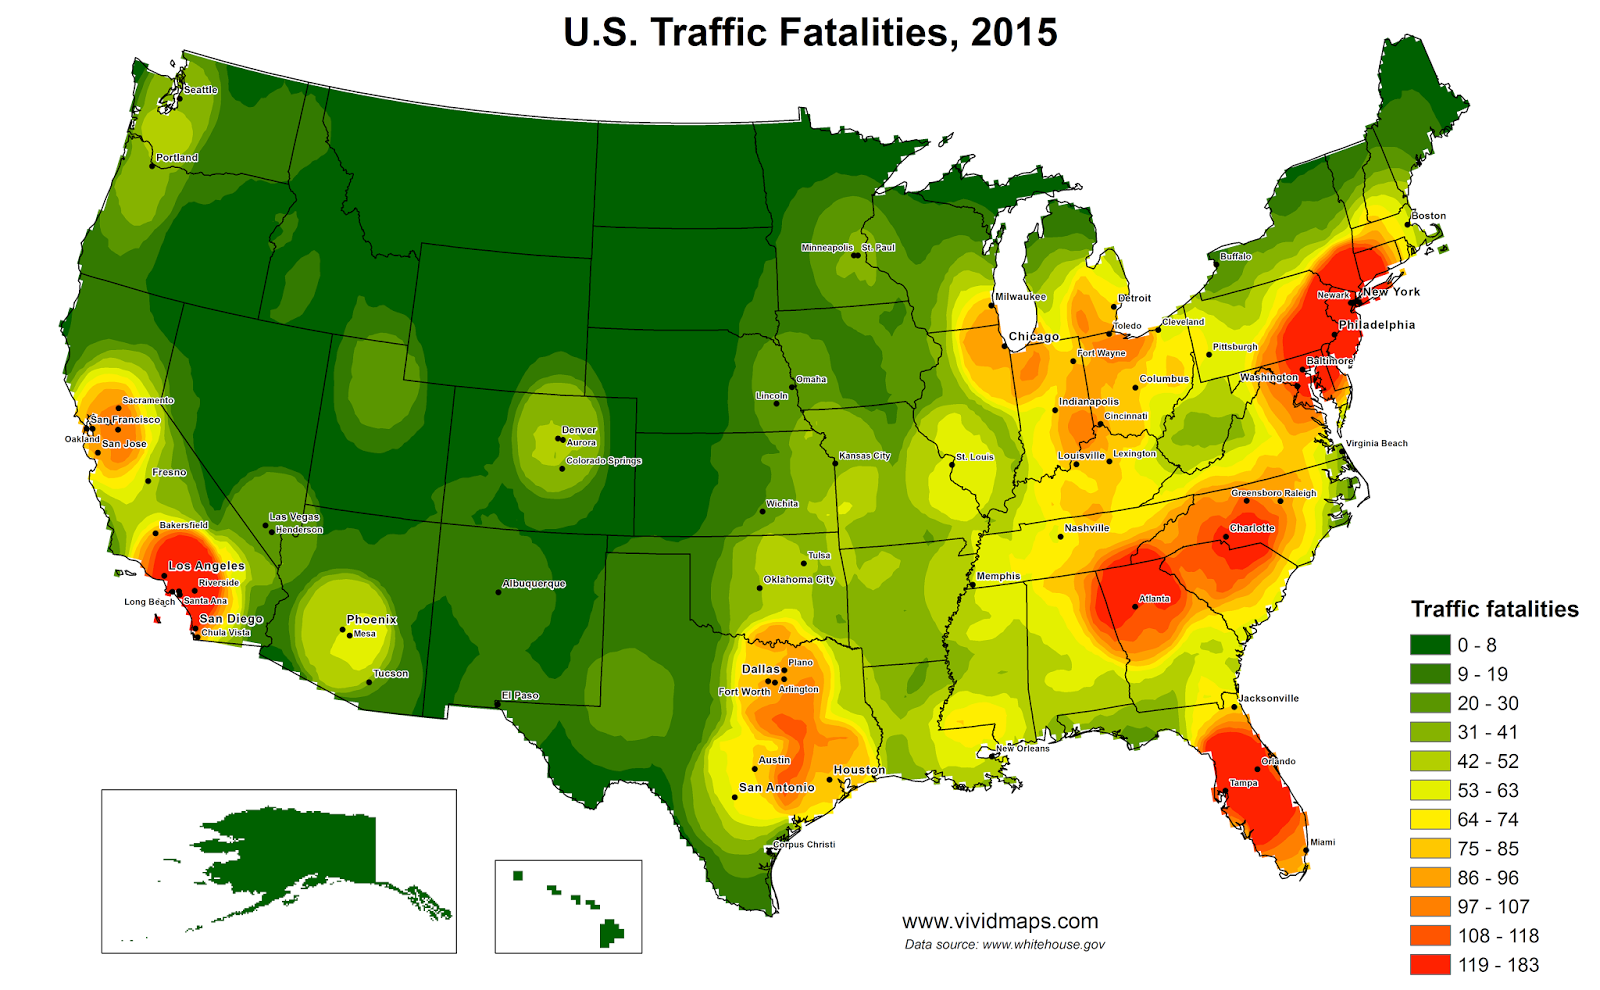

<font size ='4'> In this exploratory data analysis project we are going to analyze a countrywide car accident dataframe ,which covers all the states of the USA.The timeframe of the data range from February 2016 to December 2020,with a lot of different features and characteristics for each and every accident.The data was collected from databases of a variety of legal and law enforcement entities such as the US and state departments of transportation,traffic sherifs reports,traffic cameras and traffic sensors within the wide road networks of the USA.In this particular dataset there are close to 1.5 million recorded cases. </font>

## Path of the Exploratory Data Analysis

*  In this project we will try to answer some key questions about and convy critical information using the help of the EDA tools we have in our disposal
* Plus we are going to use the <span color='red'> Geopandas </span> Library for plotting the datapoints on the USA map.


## Some basic questions about the Data
* Which city in the US has reported most number of Accident Cases in the past 5 years(2016-2020)??
* Which  are the top 10 accedint prone streets in the USA??
* Per Day averagely how many road accidents took place in the US??
* In which hours of the day  most accidents occur""
* How are the basic weather conditions under the most accidents in the US occur?
* Which are the top 10 states with the most number of accidents cases in the US?


In [1]:
#Impot all necesary libraries that we are going to use.
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Let's now get the dataframe inside the notebook

df=pd.read_csv("C:\\Users\\Kostas\\Documents\\Kaggle Datasets\\US_Accidents_Dec21_updated.csv")
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


__Now we will get to know the shape and the geneal information about the dataset to get to know the data a little bit better__

In [3]:
print('The amount of accidents recorded in the dataset is:{}'.format(len(df)))
print('\n')
print('The number of different features in the dataset is:{}'.format(len(df.columns)))


The amount of accidents recorded in the dataset is:2845342


The number of different features in the dataset is:47


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

__We see from the information about the dataframe that we have to deal with a lot of diffetent columns that contain several types of data ranging from object types of data,floting point numbers and boolean values.
We will also have to see if there are null values in the dataframe and what percentage of null values compared to the whole dataframe there are.__

In [5]:
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

__Now if we want to see it as percentage of missing values we are going to do the following.__

In [6]:
round(df.isnull().sum()/len(df)*100,2)

ID                        0.00
Severity                  0.00
Start_Time                0.00
End_Time                  0.00
Start_Lat                 0.00
Start_Lng                 0.00
End_Lat                   0.00
End_Lng                   0.00
Distance(mi)              0.00
Description               0.00
Number                   61.29
Street                    0.00
Side                      0.00
City                      0.00
County                    0.00
State                     0.00
Zipcode                   0.05
Country                   0.00
Timezone                  0.13
Airport_Code              0.34
Weather_Timestamp         1.78
Temperature(F)            2.43
Wind_Chill(F)            16.51
Humidity(%)               2.57
Pressure(in)              2.08
Visibility(mi)            2.48
Wind_Direction            2.59
Wind_Speed(mph)           5.55
Precipitation(in)        19.31
Weather_Condition         2.48
Amenity                   0.00
Bump                      0.00
Crossing

__We see that in many columns there insn't any missing data and in other columns the 61% of the data is missing,and in other is missing the 20% of their data.__

<br>

__What we are going to do is to  visualize the missing data by creating a function that will notify as about the missing data in the dataframe.__

In [7]:
def missing_data(df):
    percent_nan=df.isnull().sum()/len(df)*100
    percent_nan=percent_nan[percent_nan>0].sort_values(ascending=False)
    return percent_nan

In [8]:
missing_data(df)

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Sunrise_Sunset            0.100761
Civil_Twilight            0.100761
Nautical_Twilight         0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
dtype: float64

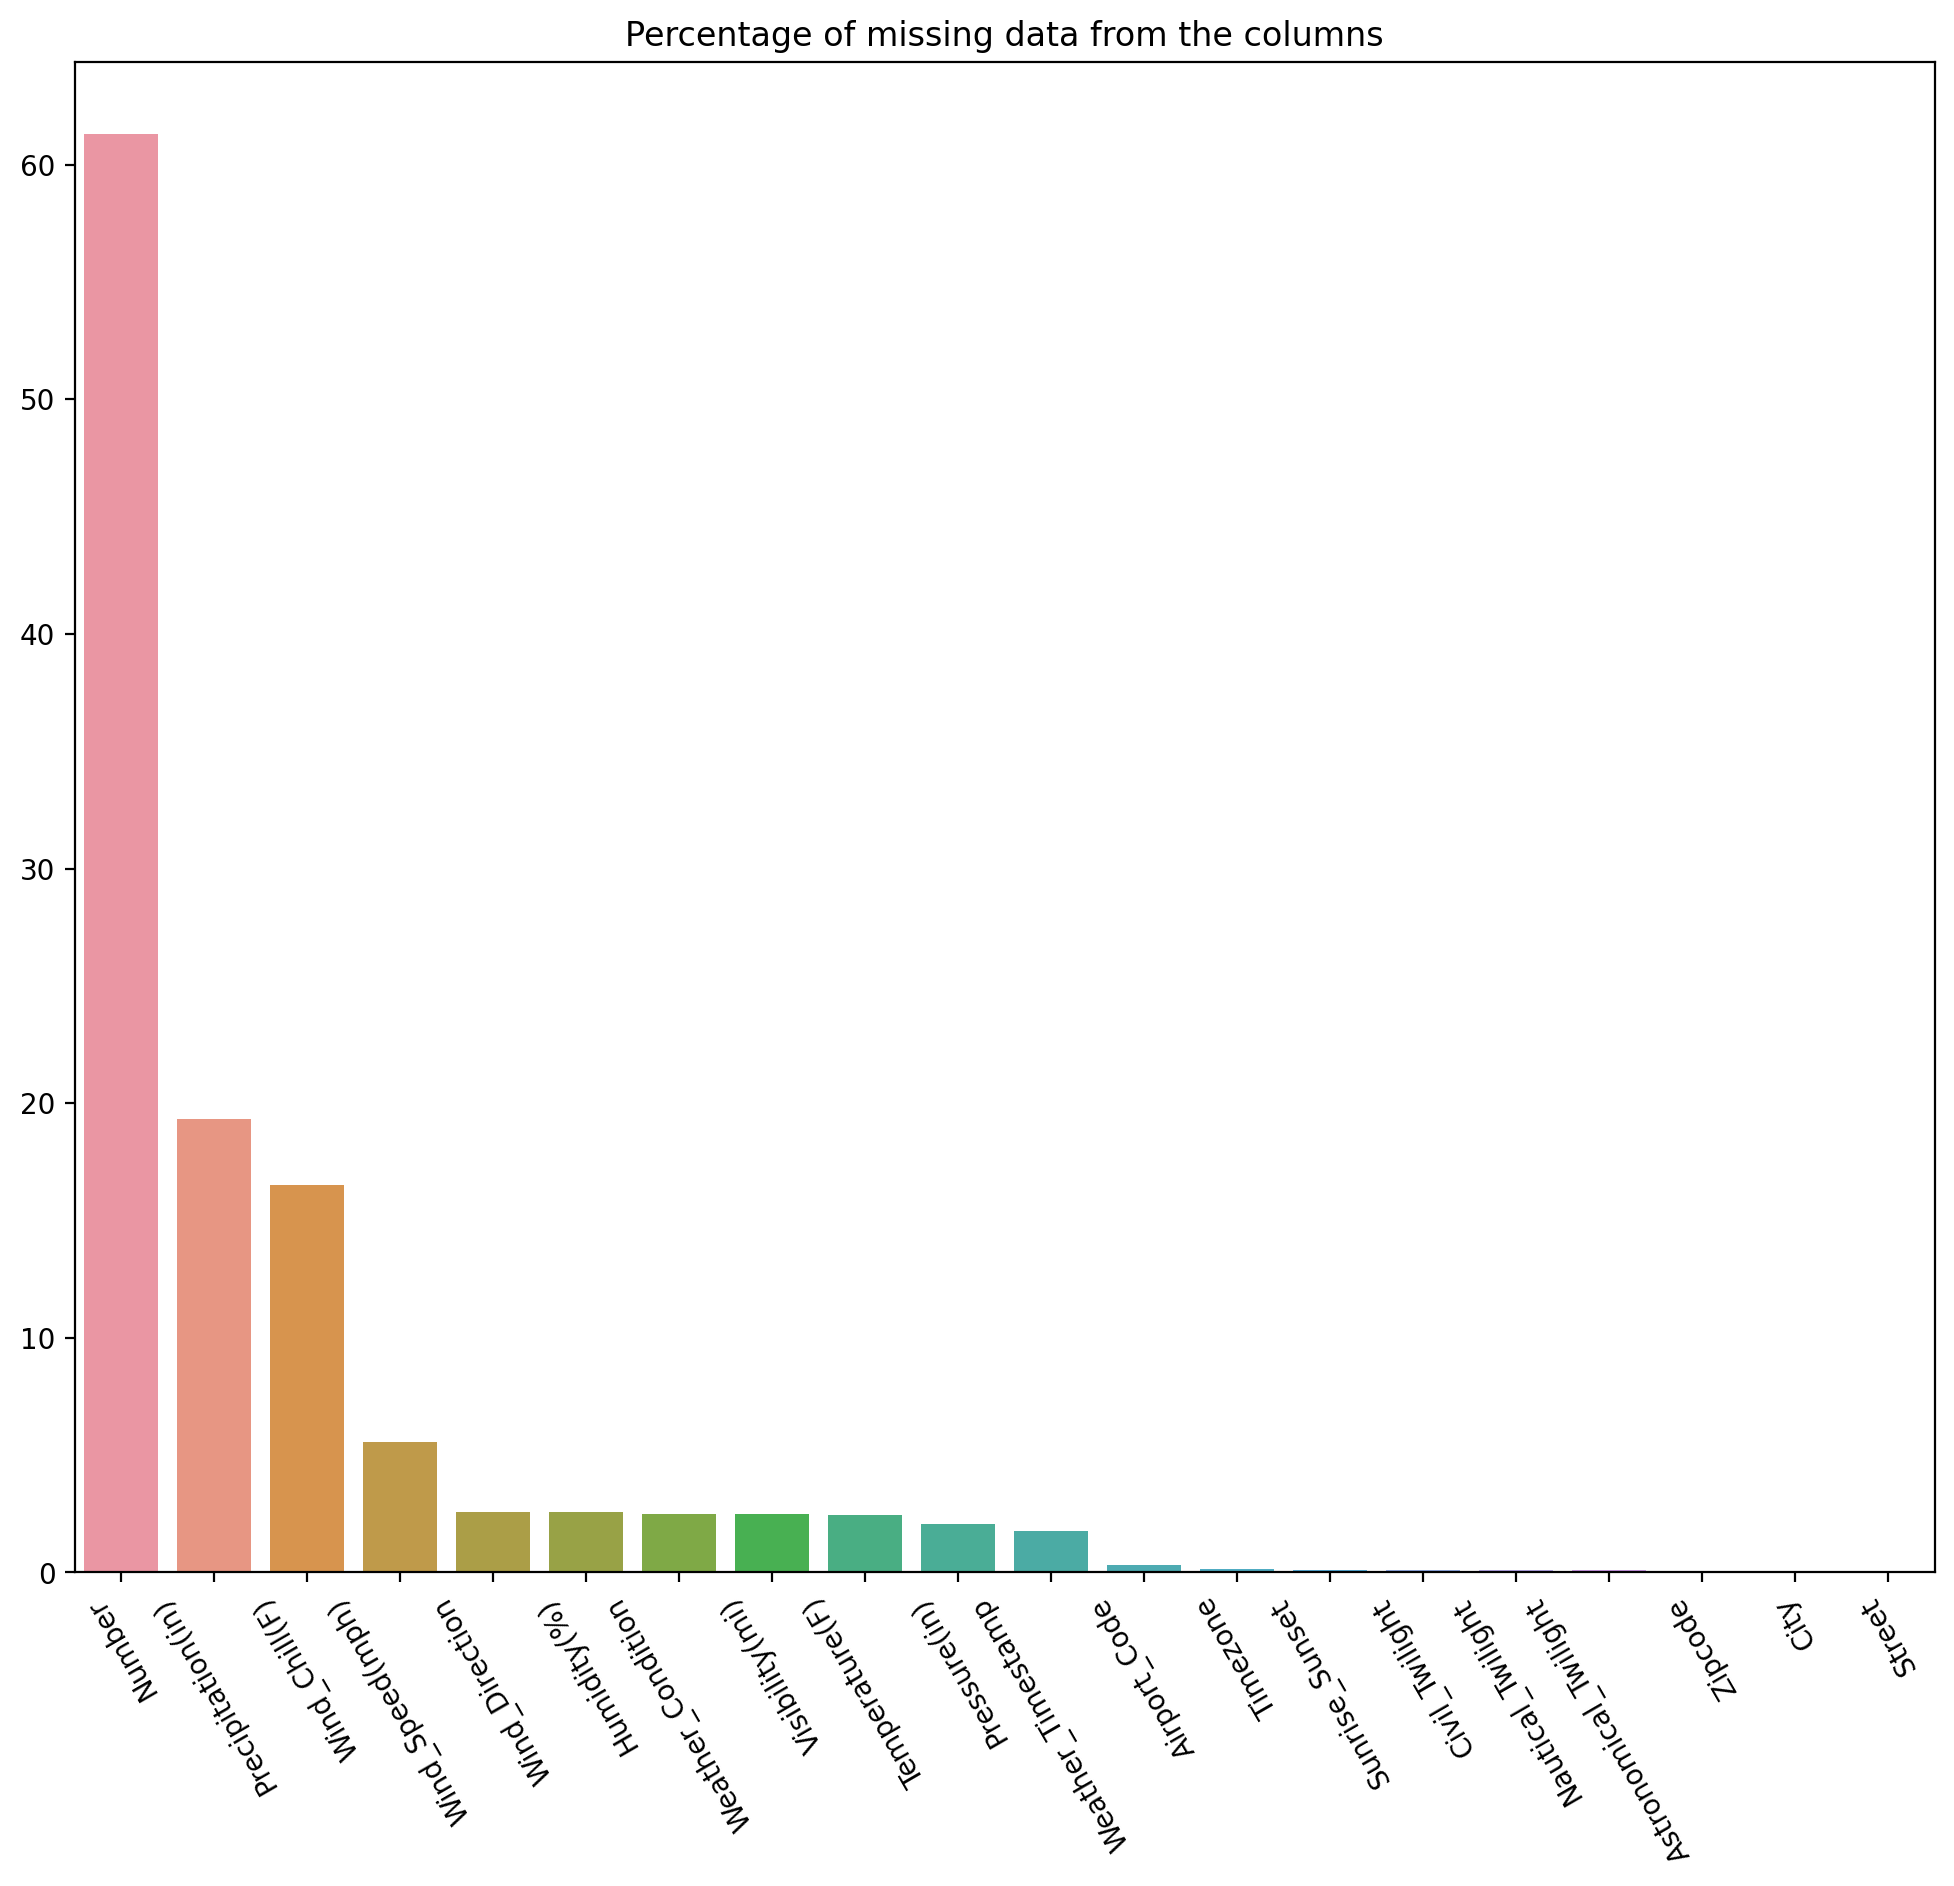

In [9]:
fig=plt.figure(figsize=(12,10),dpi=200)
sns.barplot(x=missing_data(df).index,y=missing_data(df))
plt.xticks(rotation=120)
plt.title('Percentage of missing data from the columns')
plt.show()

__What we did with the above code is to do a visual representation of how much of the data is missing from the columns and we did it with a descending order,meaning that from left to right,we see the columns that are missing their vast majority of their data and going to the right we see the columns that are missing less and less data.__

__<br>
-As we can see in the Number column the 60% of data is missing.
<br>
-There is also 45% of data missing from the precipitation column.
<br>
-From the wind column 40% of data is missing.
<br>
-Instead of trying to fill in the missing data it would be better if we completely removed these columns from the dataset.__

__Now what we are going to do,is to start coming to some conclusions about the data,by visualizing the states with the most number of car accidents in the years that this dataframe covers(2016-2020),and we are going to do that in the same descending order,meaning that strarting from the left side of the plot we are seeing the states with the most amount of accidents occured in them.__


In [10]:
#We are going to delete some columns that we really don't need starting from 
#the country column because we already know that we are researching the USA

df=df.drop(['Country'],axis=1)

#Also we are going to erase the precipitation column because it missing a lot of
#data.

df=df.drop(['Precipitation(in)'],axis=1)

#We are also going to delete the number colums because a lot of data is missing
#from there too.

df=df.drop(['Number'],axis=1)

In [11]:
#Now we are also going to delete some other columns that will not serve to draw
#any significant conclusions about the severity of the road accidents in USA.
df=df.drop(['Start_Lat'],axis=1)
df=df.drop(['End_Lat'],axis=1)
df=df.drop(['Airport_Code'],axis=1)
df=df.drop(['Pressure(in)'],axis=1)
df=df.drop(['Wind_Speed(mph)'],axis=1)
df=df.drop(['Give_Way'],axis=1)
df=df.drop(['Roundabout'],axis=1)
df=df.drop(['Traffic_Calming'],axis=1)
df=df.drop(['Astronomical_Twilight'],axis=1)
df=df.drop(['Nautical_Twilight'],axis=1)
df=df.drop(['Sunrise_Sunset'],axis=1)
df=df.drop(['Weather_Timestamp'],axis=1)

In [12]:
#Now let's see the new dataframe that we have after removing all those columns 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 32 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 object 
 1   Severity           int64  
 2   Start_Time         object 
 3   End_Time           object 
 4   Start_Lng          float64
 5   End_Lng            float64
 6   Distance(mi)       float64
 7   Description        object 
 8   Street             object 
 9   Side               object 
 10  City               object 
 11  County             object 
 12  State              object 
 13  Zipcode            object 
 14  Timezone           object 
 15  Temperature(F)     float64
 16  Wind_Chill(F)      float64
 17  Humidity(%)        float64
 18  Visibility(mi)     float64
 19  Wind_Direction     object 
 20  Weather_Condition  object 
 21  Amenity            bool   
 22  Bump               bool   
 23  Crossing           bool   
 24  Junction           bool   
 25  No_Exit           

__We see now that after the deletion of the columns that we didn't need the dataframe now has less columns than before*(In the beginning we had to deal with 48 columns and now there are only 32)*.__
<br>

__Let's now see how the missing values graph has changed from the original we created before the column deletion.__

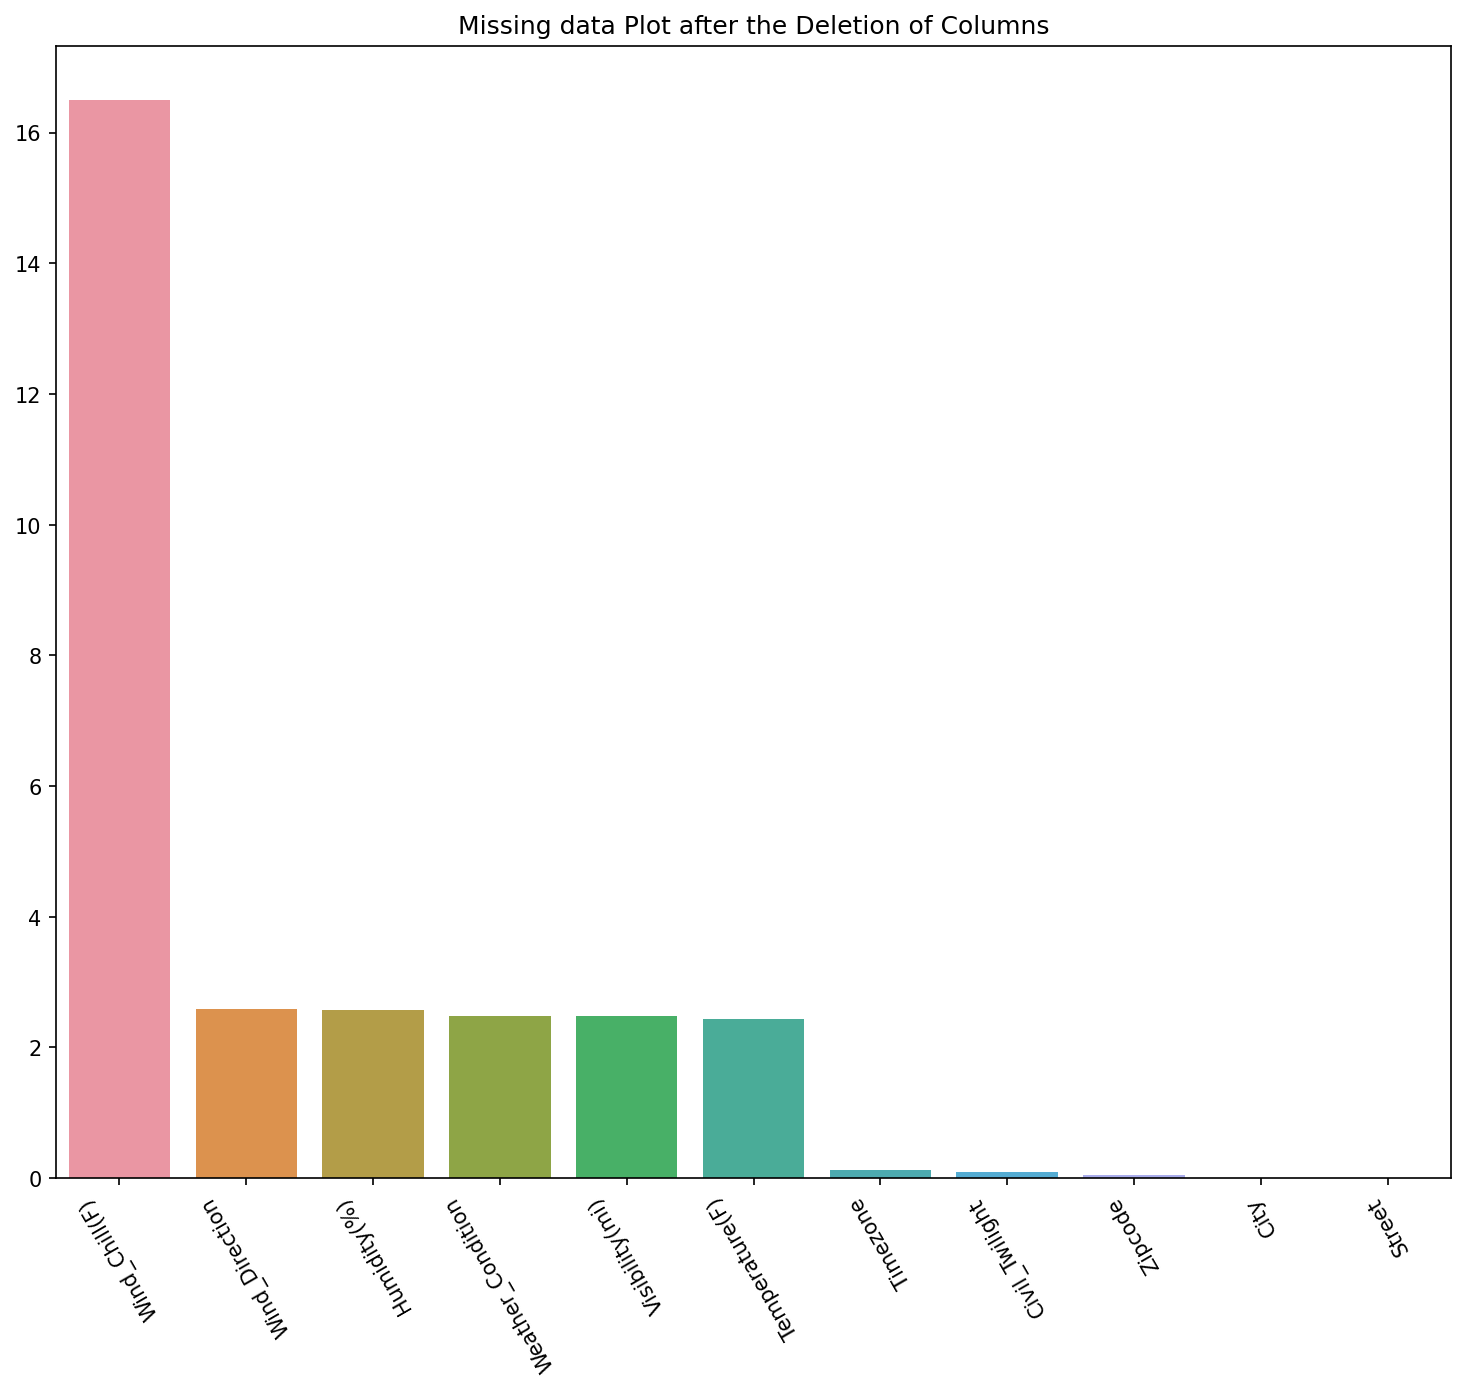

In [13]:
fig=plt.figure(figsize=(12,10),dpi=150)
sns.barplot(x=missing_data(df).index,y=missing_data(df))
plt.title('Missing data Plot after the Deletion of Columns')
plt.xticks(rotation=120)
plt.show()

In [14]:
#Now we are gonna see the dataframe's columns

df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lng', 'End_Lng',
       'Distance(mi)', 'Description', 'Street', 'Side', 'City', 'County',
       'State', 'Zipcode', 'Timezone', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Visibility(mi)', 'Wind_Direction', 'Weather_Condition',
       'Amenity', 'Bump', 'Crossing', 'Junction', 'No_Exit', 'Railway',
       'Station', 'Stop', 'Traffic_Signal', 'Turning_Loop', 'Civil_Twilight'],
      dtype='object')

In [15]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lng,End_Lng,Distance(mi),Description,Street,Side,...,Bump,Crossing,Junction,No_Exit,Railway,Station,Stop,Traffic_Signal,Turning_Loop,Civil_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,-83.092860,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Outerbelt E,R,...,False,False,False,False,False,False,False,False,False,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,-84.062800,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,I-70 E,R,...,False,False,False,False,False,False,False,False,False,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,-84.524680,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,I-75 S,R,...,False,False,True,False,False,False,False,False,False,Night
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,-81.537840,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,I-77 N,R,...,False,False,False,False,False,False,False,False,False,Night
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,-84.492792,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,I-75 S,R,...,False,False,False,False,False,False,False,False,False,Day


## Input of the Missing Values

* 1.Input the missing values for the numerical columns.

In [16]:
df['Temperature(F)']=df['Temperature(F)'].fillna(df['Temperature(F)'].mean())
df['Humidity(%)']=df['Humidity(%)'].fillna(df['Humidity(%)'].mean())
df['Visibility(mi)']=df['Visibility(mi)'].fillna(df['Visibility(mi)'].mean())

* 2.Input the missing values from the categorical columns.

In [17]:
#We are going to drop the rows where the feature 'City' exists because it is not
#missing a lot of values(<1%)

df=df.dropna(subset=['City'],axis=0)

In [18]:
df['Weather_Condition']=df['Weather_Condition'].fillna(df['Weather_Condition'].value_counts().sort_values(ascending=False).index[0])

__Now our data is clean,note that this is an exploratory data analysis project so we won't be transforming all of the missing values of the numerical and categoricall columns to integers or floats,since we won't be passing those as arguments to a Machine Learning Model.__

<br>

__With the above code we just filled the missing values of the Weather Condition column with the most common weather condition of all the accidents whcih was 'Fair'.__

-------------------------------------------------------------------------------

## We finished with the data processing part of our project and now let's do some analysis.


*What we are gonna do with the code below is see the state graph,which from left to right is gonna visualize the state with the most car accidents that occured in it,and moving to the right the  states with less car accidents happened on it during this span of 5 years.*

In [19]:
my_state_df=df['State'].value_counts().sort_values(ascending=False).to_frame()

In [20]:
my_state_df=my_state_df.reset_index()

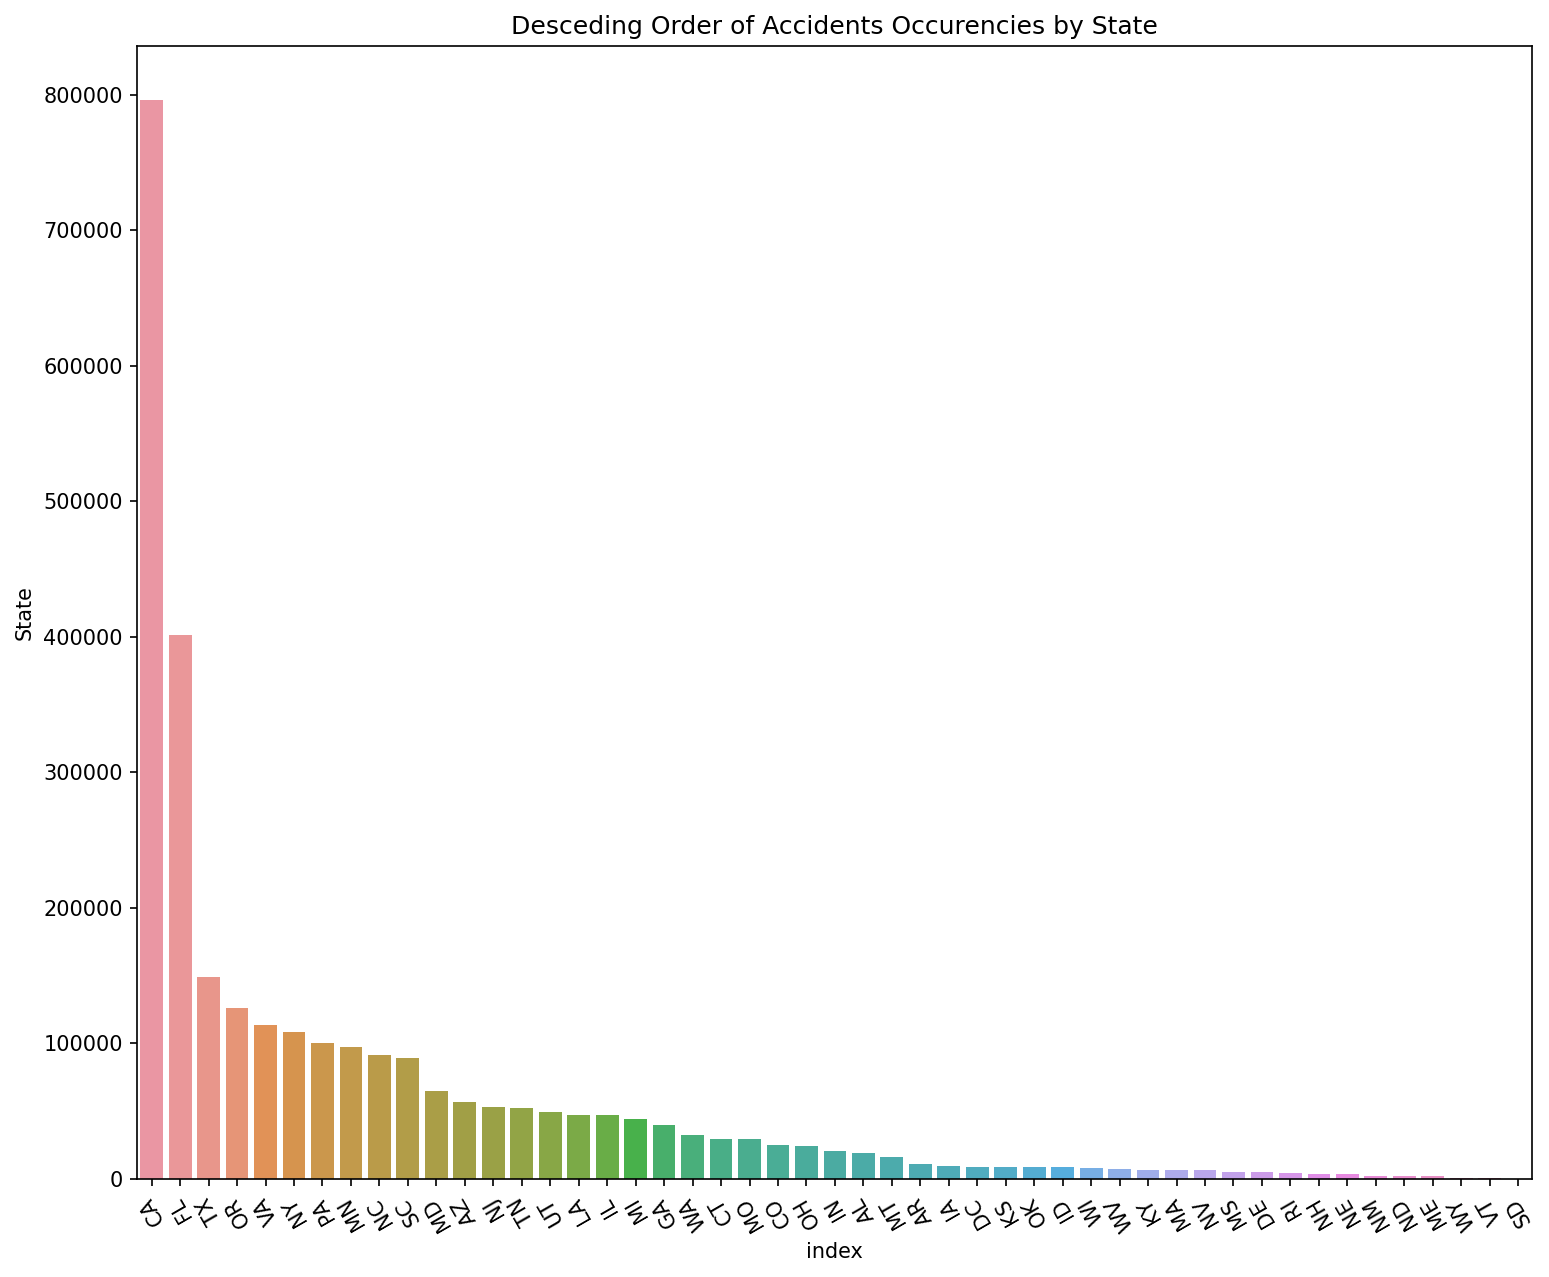

In [21]:
fig=plt.figure(figsize=(12,10),dpi=150)
sns.barplot(data=my_state_df,x='index',y='State')
plt.title('Desceding Order of Accidents Occurencies by State')
plt.xticks(rotation=120)
plt.show()

### Now let's see the top 10 cities with the most car accidents occured.

In [22]:
#We are going to make a new df in which we are gonna store the cities.

df_city=df['City'].value_counts().sort_values(ascending=False).to_frame().reset_index()[:20]
df_city.columns=['City','Number of Accidents']

In [23]:
#Let's take a look and see how our new created dataframe looks

df_city.head()

,City,Number of Accidents
0,Miami,106966
1,Los Angeles,68956
2,Orlando,54691
3,Dallas,41979
4,Houston,39448


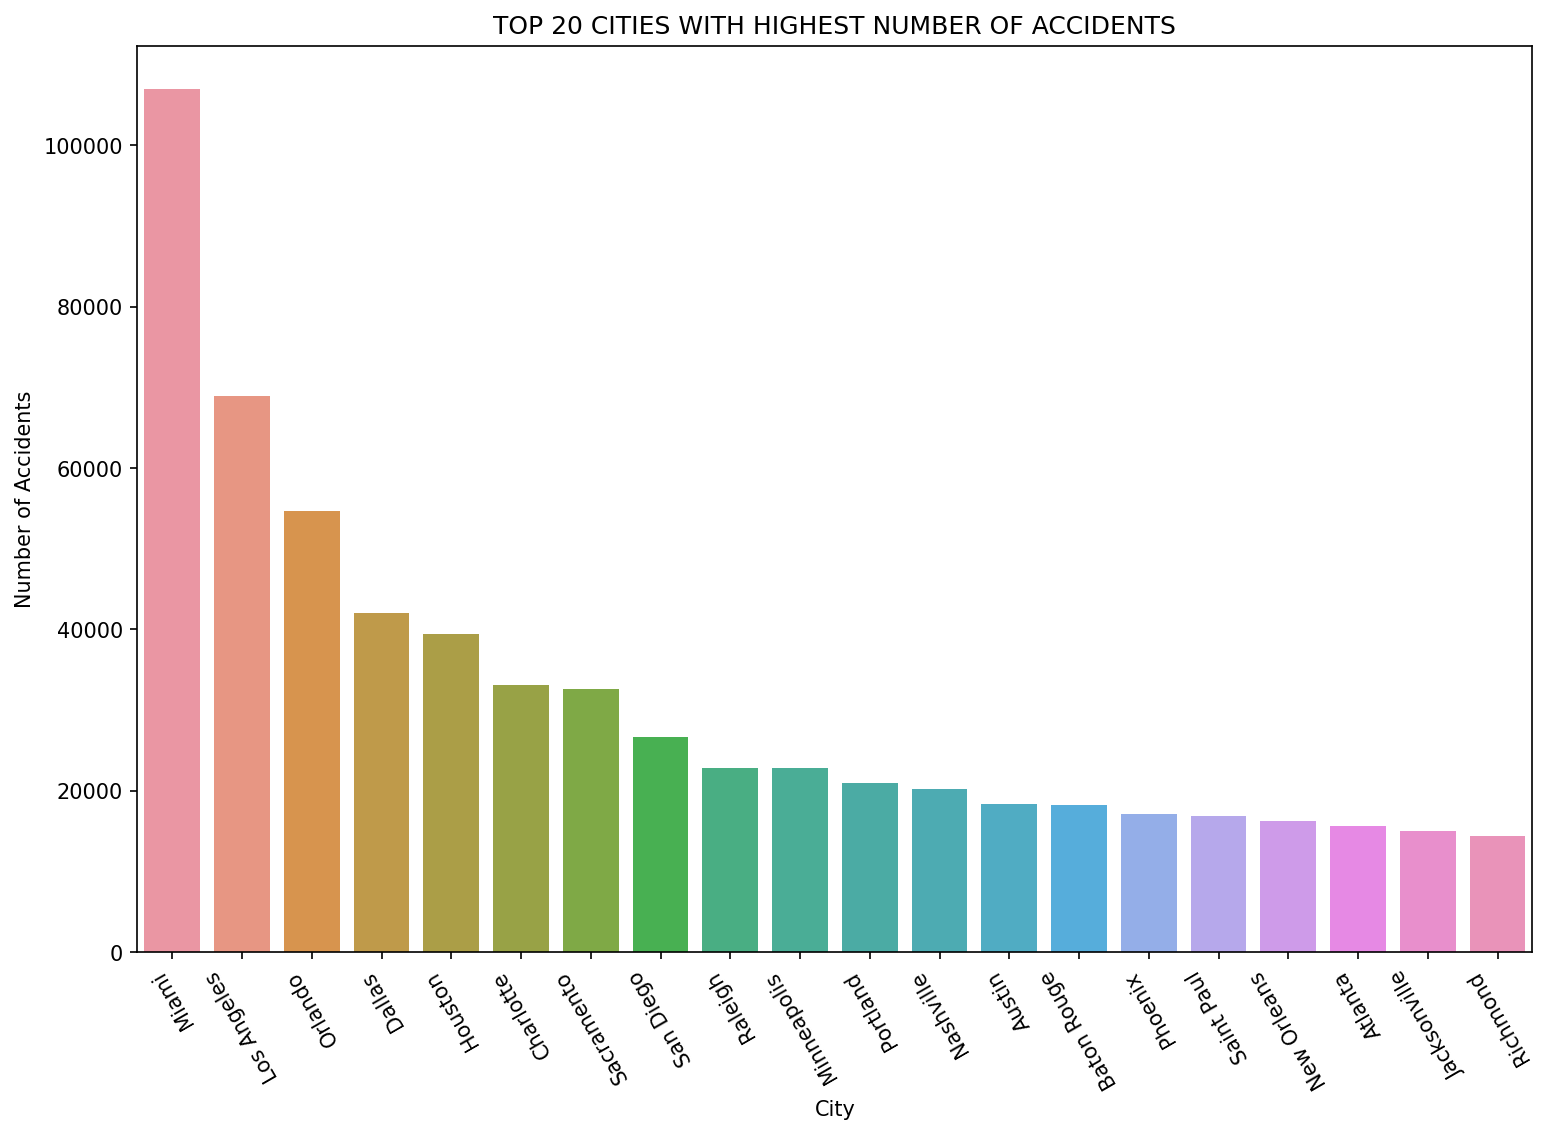

In [24]:
#Let's now plot the graph and visualize the information 

fig=plt.figure(figsize=(12,8),dpi=150)
sns.barplot(data=df_city,x='City',y='Number of Accidents')
plt.title('TOP 20 CITIES WITH HIGHEST NUMBER OF ACCIDENTS')
plt.xticks(rotation=120)
plt.show()

__We can see that the most accidents occured in large urban areas like Miami,Los Angeles,Orlando,Dallas,Houston,San Antonio etc.This is very common because in more rural areas where the traffic network is far less complex the accidents happen more sparsly.__

<br>

__Now we are gonna see the 20 streets with the most number of accidents in USA.__

In [25]:
#We are gonna create a new df just as what we did with the state_df

street_df=df['Street'].value_counts().sort_values(ascending=False).reset_index()[:20]
street_df.columns=['Street','Number of Accidents']

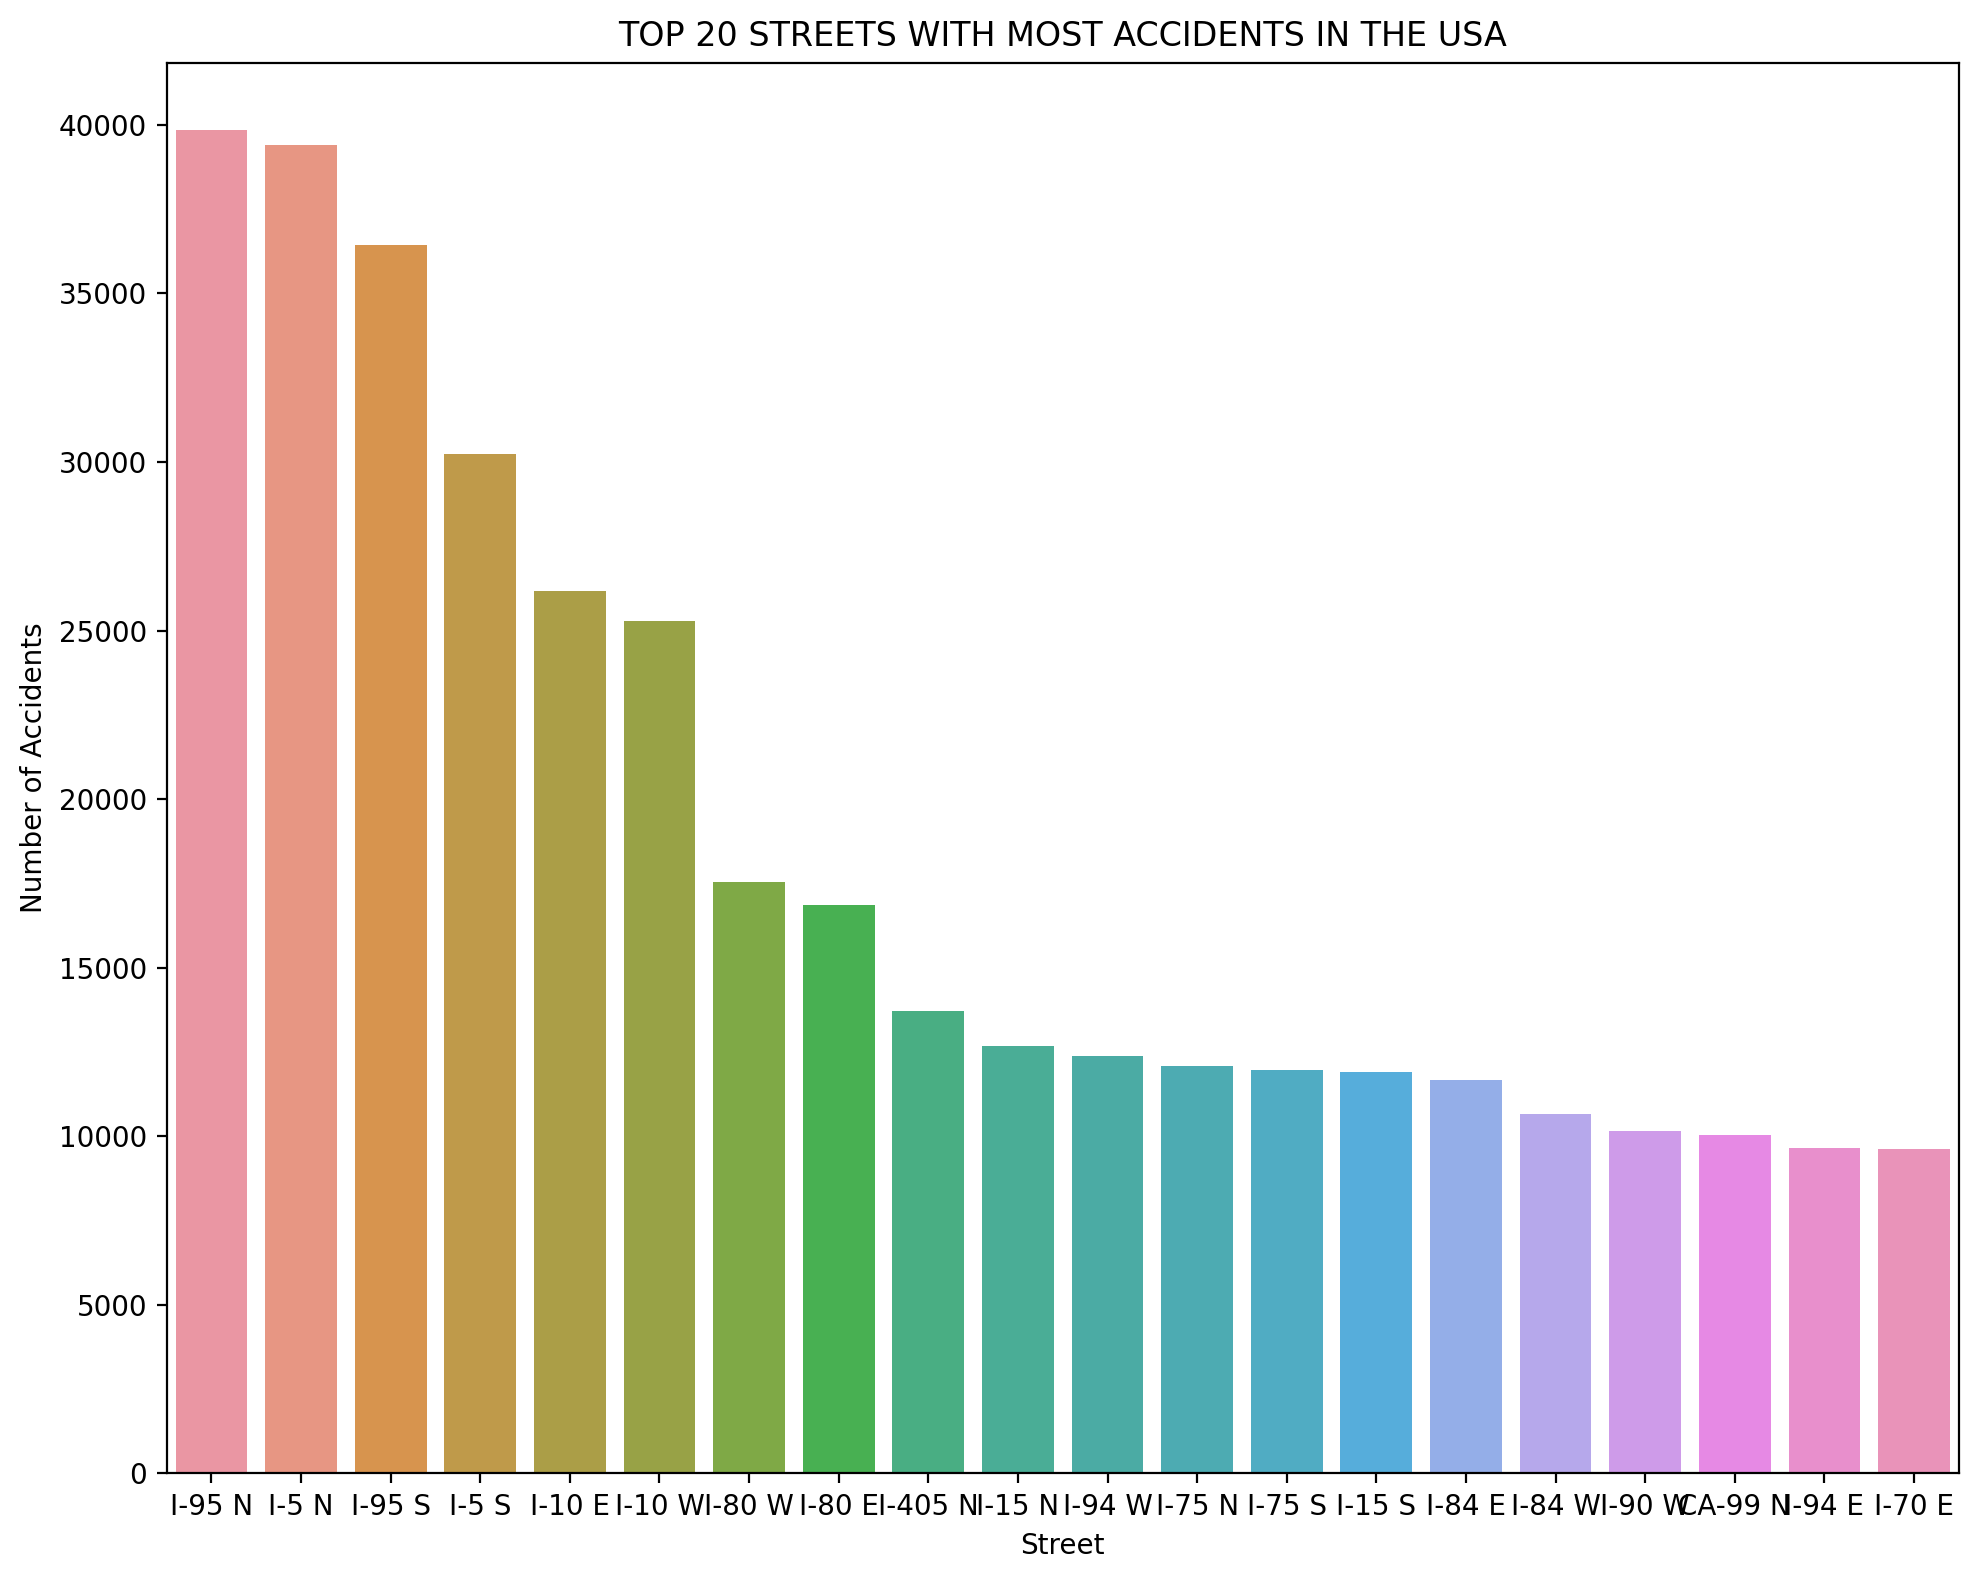

In [26]:
#let's now plot the barplot with the most commons streets.

fig=plt.figure(figsize=(10,8),dpi=200)
sns.barplot(data=street_df,x='Street',y='Number of Accidents')
plt.title('TOP 20 STREETS WITH MOST ACCIDENTS IN THE USA')
plt.tight_layout()
plt.show()

#### Now let's take a look at the severity of the accidents that happened across the span of these years.

In [27]:
df['Severity'].value_counts()

2    2532880
3     155101
4     131174
1      26050
Name: Severity, dtype: int64

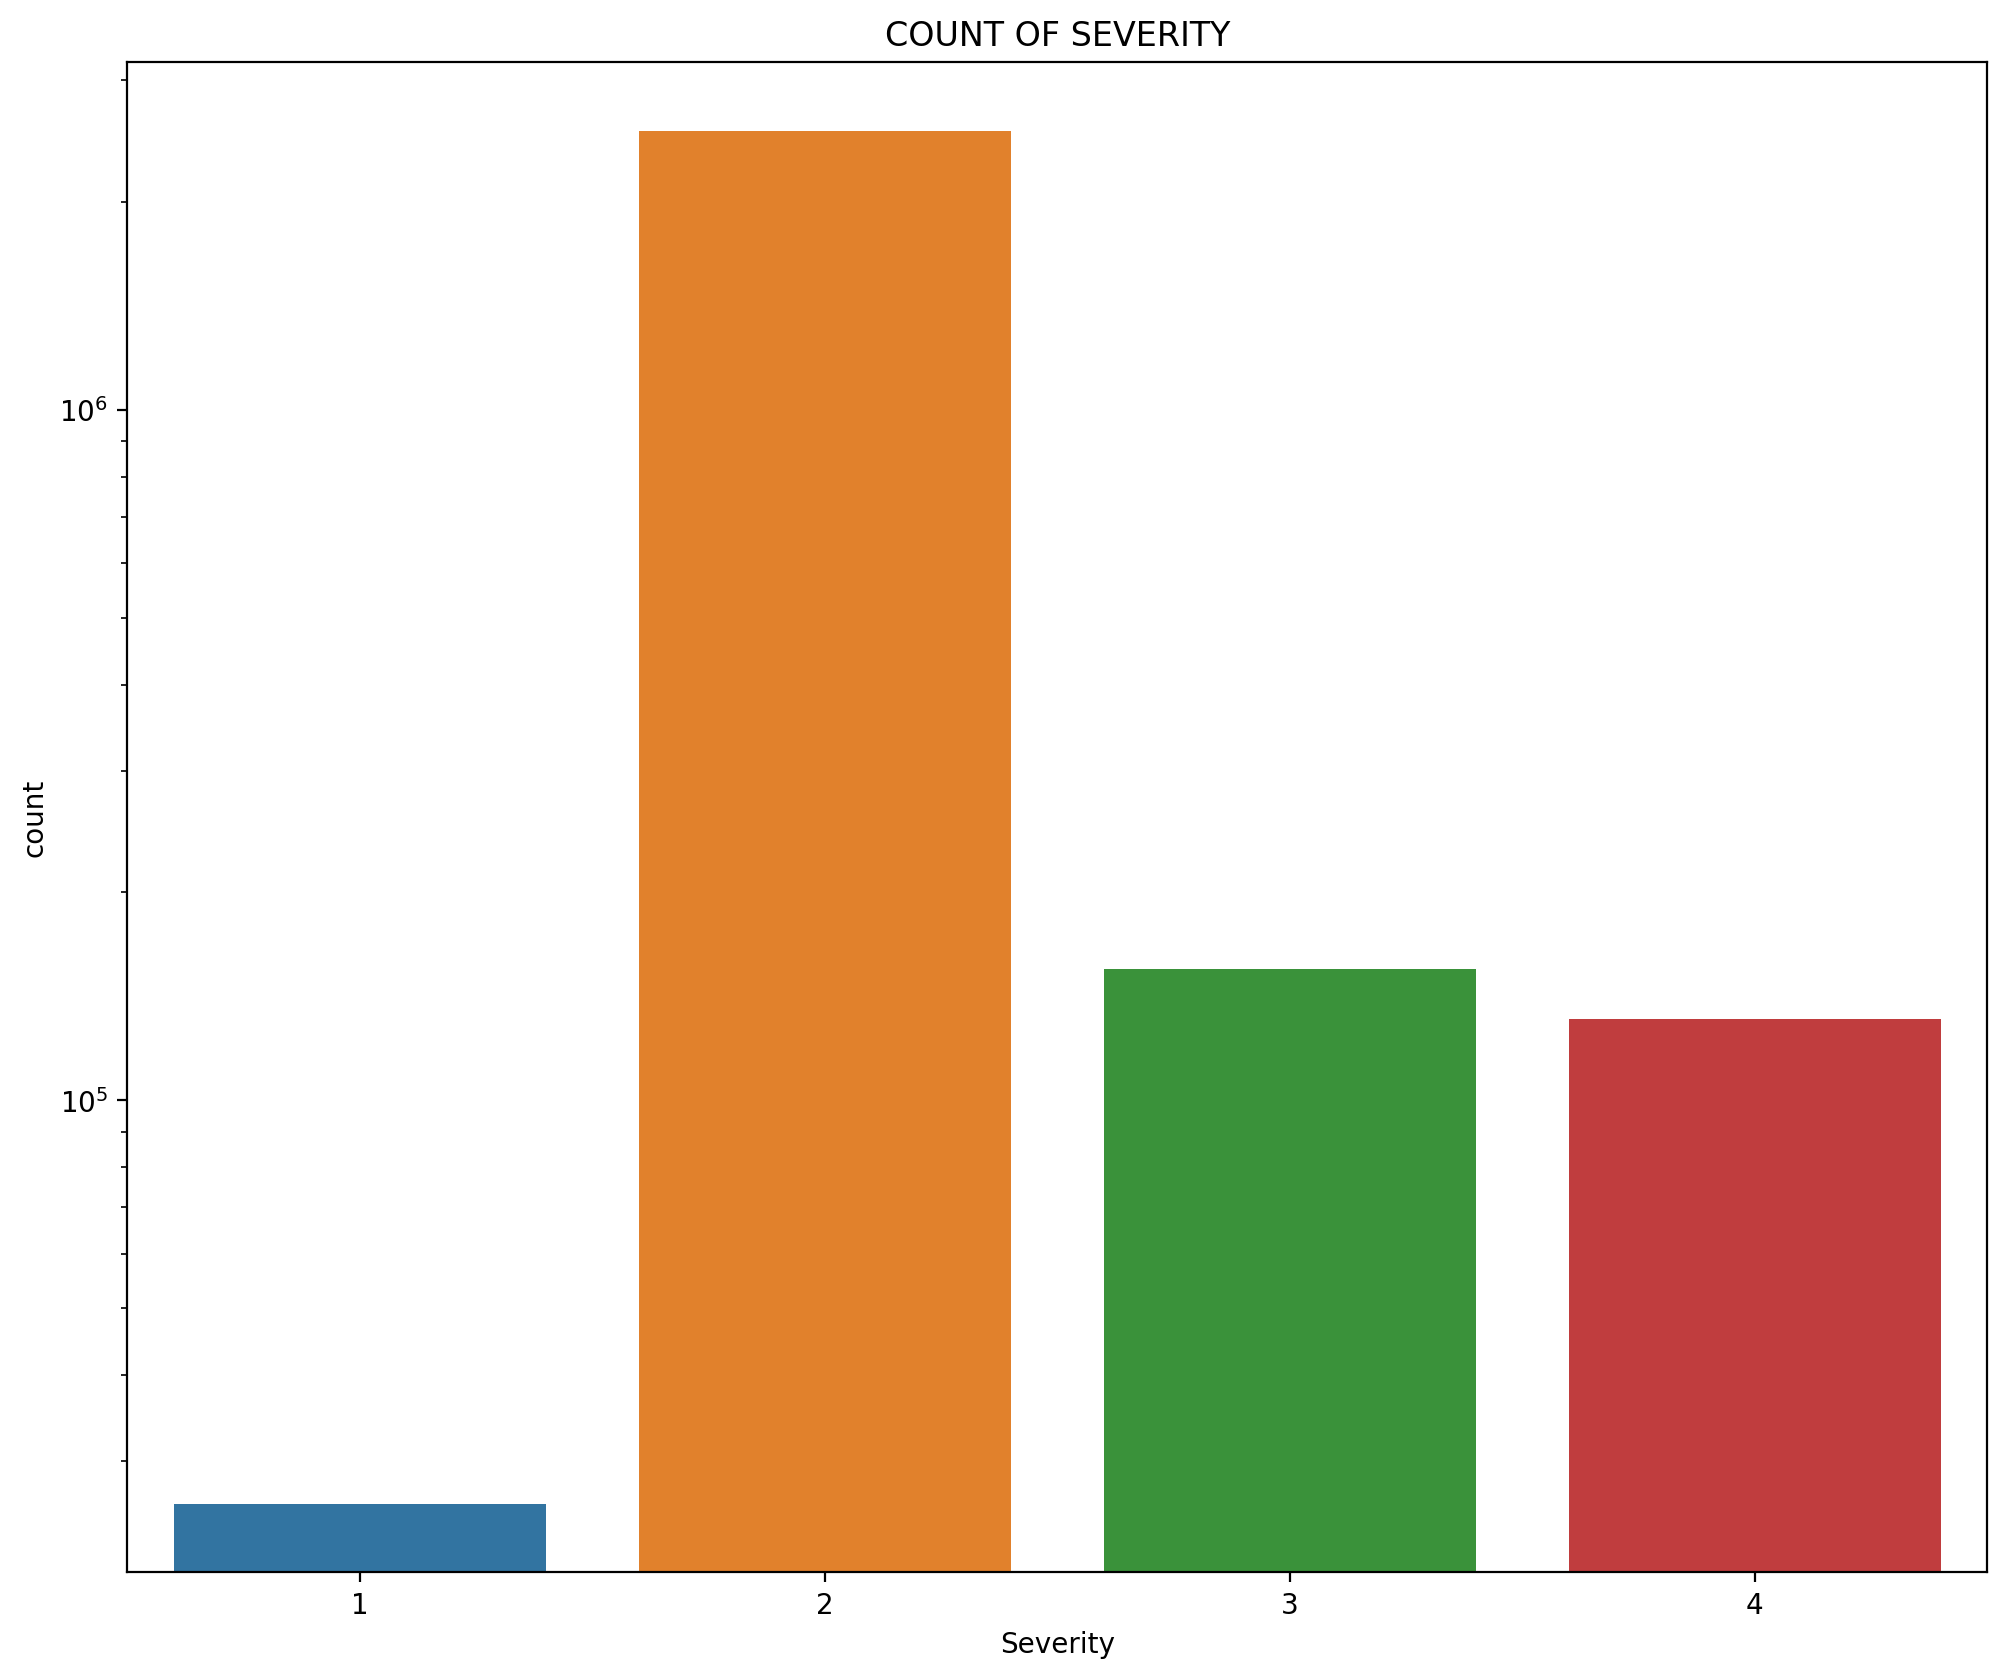

In [28]:
#Now let's plot out the severity 

fig=plt.figure(figsize=(12,10),dpi=200)
sns.countplot(x=df['Severity'])
plt.yscale('log')
plt.title('COUNT OF SEVERITY')
plt.show()

__We see that most of the accidents fall into the severity scale of 2,meaning that the majority of the entire accidents is on the not to severe scale,though we can see that the severity one accidents are the accidents that occur less often than the accidents that fall into the other severity scales.__

-------------------------------------------------------------------------------

__We also see that there are many columns that contain dates and date information aobut the data,like the column 'Start_Time',that pinpoints the exact date of the occurence of the accident.That would be nice if we actually transformed it into a datetime object using Python and Pandas.__

In [29]:
#Let's create some new columns for our dataframe

df['Start_Time']=pd.to_datetime(df['Start_Time'])

#Now we have converted the above column from a string value to a timestamp one.
#We are now gonna use the DatetimeIndex method to create the columns we need.

df['Year']=pd.DatetimeIndex(df['Start_Time']).year

df['Month']=pd.DatetimeIndex(df['Start_Time']).month

df['DayOfWeek']=pd.DatetimeIndex(df['Start_Time']).dayofweek

df['day']=pd.DatetimeIndex(df['Start_Time']).day

__With the above code we transformed the 'Start_Time' columns from a string object to a datetime one using the pd.to_datetime function and off of that we created 4 other columns that each and everone contains the separate parts of the 'Start_Time' column,meaning the year,month,day of week(name),and day of year.__

------------------------------------------------------------------------------

__Now we are goona plot the accidents as they took place with chronological order,and see which year suffered the most accidents and much more.__

In [30]:
yearly_accidents=df['Year'].value_counts().sort_values(ascending=False).to_frame().reset_index()
yearly_accidents.columns=['Year','Number of Accidents']
yearly_accidents.head()

,Year,Number of Accidents
0,2021,1511684
1,2020,625826
2,2019,258610
3,2017,163903
4,2018,163171


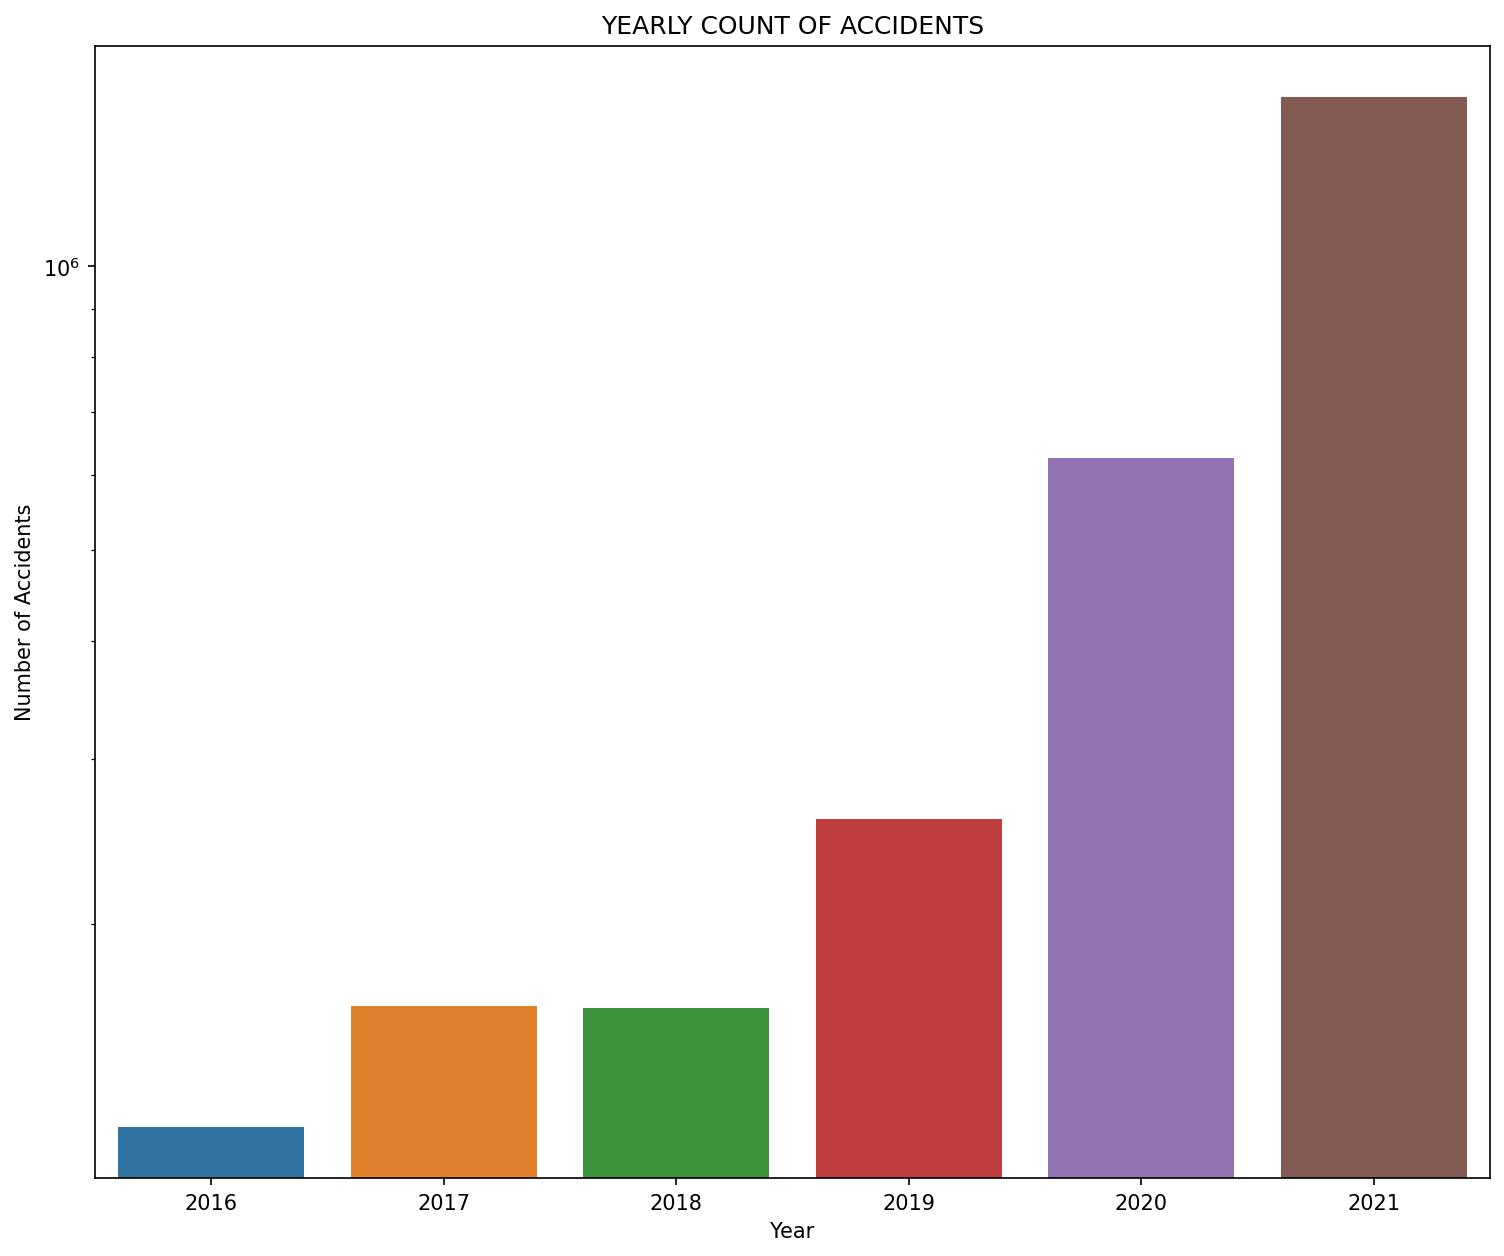

In [31]:
#Now let's plot and see in which year the USA suffered the most accidents.

fig=plt.figure(figsize=(12,10),dpi=150)
sns.barplot(data=yearly_accidents,x='Year',y='Number of Accidents')
plt.title("YEARLY COUNT OF ACCIDENTS")
plt.yscale('log')
plt.show()

__We clearly see that in the year 2021 USA suffered the most accidents out of all these 6 years that we study and by a wide margin from 2020.__

__Now let's check the month column that we created__

In [32]:
df.Month.unique()

#We have the month of the year as a numericall value.
#We will transform them into names(1:January,2:February,etc...)

array([ 2,  3,  4,  5,  6, 11, 12,  1, 10,  9,  8,  7], dtype=int64)

In [33]:
df['Month']=df['Start_Time'].dt.month_name()

#Now we are going to create a montly accidents dataframe which we are going to 
#plot later on to see the months in which the most accidents occured.

monthly_accidents=df['Month'].value_counts().sort_values(ascending=False).reset_index()
monthly_accidents.columns=['Month','Number of Accidents']

monthly_accidents=df[['Month','Year']].value_counts().sort_values(ascending=False).reset_index()
monthly_accidents.columns=['Month','Year','Number of Accidents per Year per Month']

monthly_accidents.head()


,Month,Year,Number of Accidents per Year per Month
0,December,2021,265740
1,November,2021,185356
2,October,2021,144462
3,September,2021,132465
4,August,2021,117706


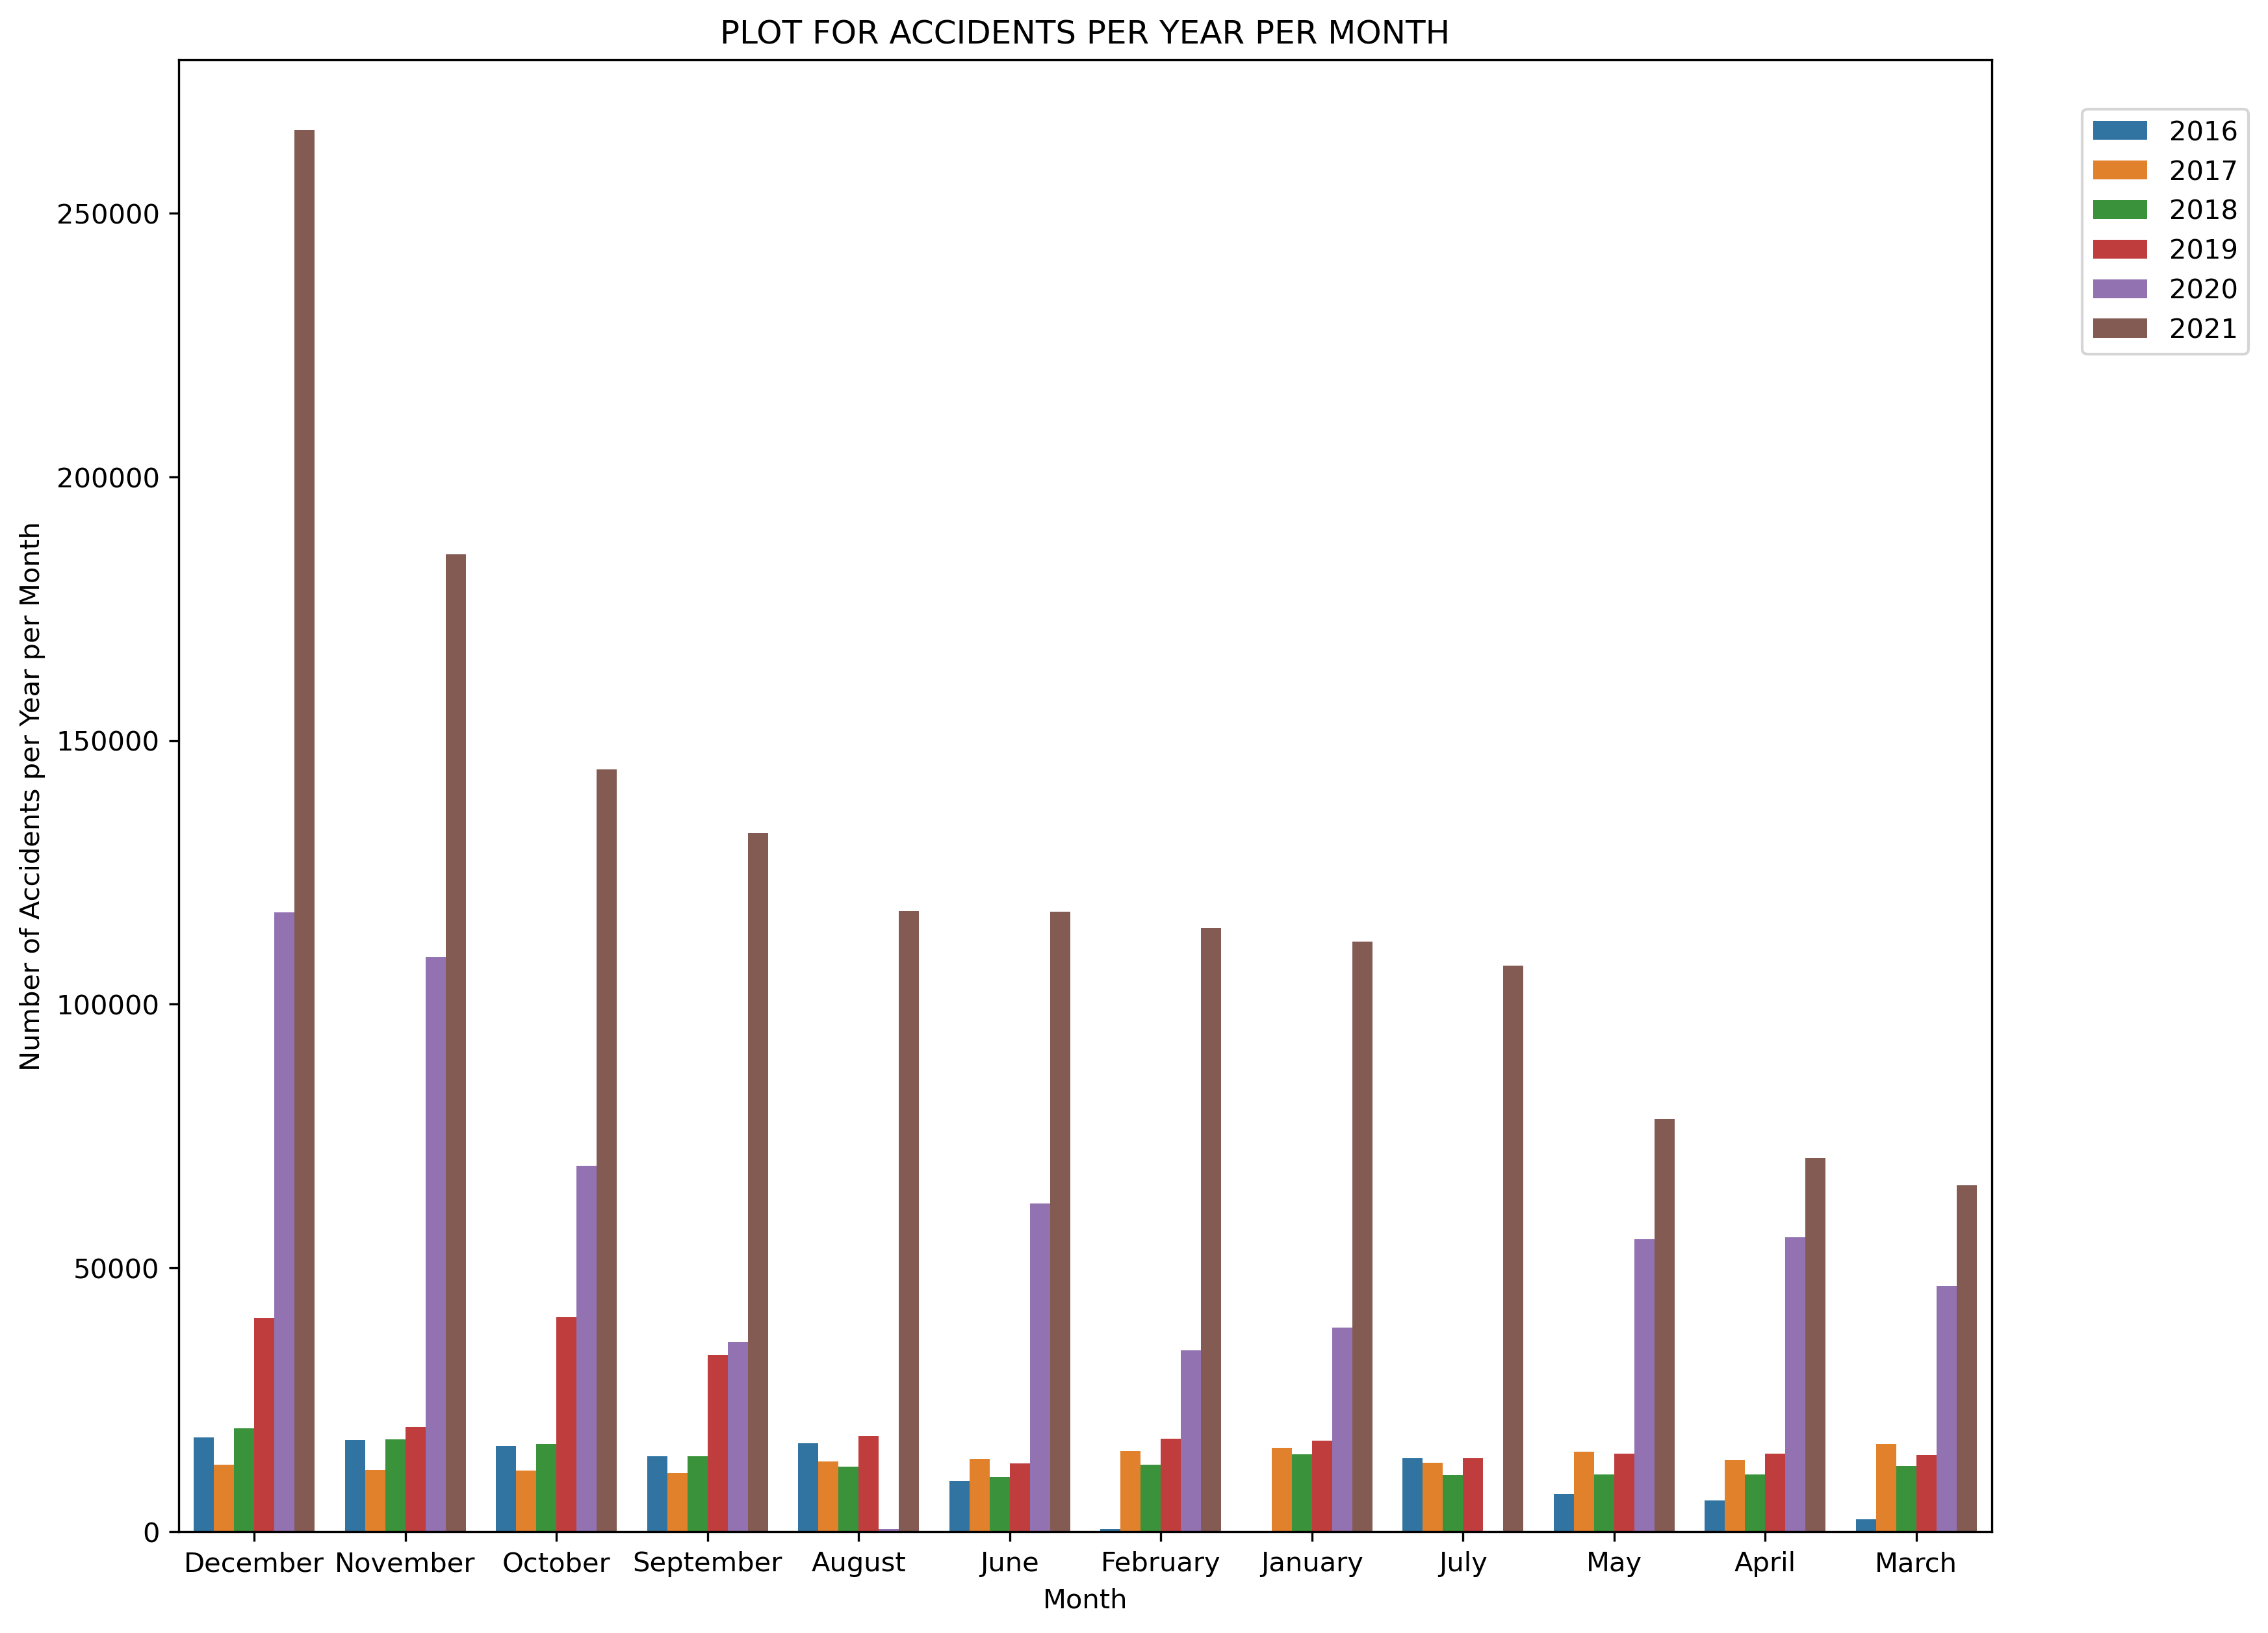

In [34]:
#Now let's plot this graph with the month,year,and count of accidents.

fig=plt.figure(figsize=(12,10),dpi=300)
sns.barplot(data=monthly_accidents,x='Month',y='Number of Accidents per Year per Month',hue='Year')
plt.title('PLOT FOR ACCIDENTS PER YEAR PER MONTH')
plt.legend(loc=(1.05,0.8))
plt.show()

__With the above code we saw that,again the assumption that the most accidents happened in 2021 gets validated with the above graph.__

------------------------------------------------------------------------------



__Now lets see about the days of the month,and the days of the week.__

In [35]:
df['day'].unique()

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  1,  2,  3,  4,  5,  6,  7, 30, 31],
      dtype=int64)

In [36]:
weekly_accidents=df[['DayOfWeek','Year']].value_counts().sort_values(ascending=False).reset_index()
weekly_accidents.columns=['DayOfWeek','Year','Count of Accidents']
weekly_accidents.head()


,DayOfWeek,Year,Count of Accidents
0,4,2021,264253
1,3,2021,235203
2,2,2021,230211
3,1,2021,221670
4,0,2021,211476


In [37]:
weekly_accidents['DayOfWeek']=weekly_accidents['DayOfWeek'].map({0:'Sunday',
                                                                1:'Monday',
                                                                2:'Tuesday',
                                                                3:'Wednesday',
                                                                4:'Thursday',
                                                                5:'Friday',
                                                                6:'Saturday'})

#We are changing the numerical values of the days to their exact names.

In [38]:
weekly_accidents.head()

,DayOfWeek,Year,Count of Accidents
0,Thursday,2021,264253
1,Wednesday,2021,235203
2,Tuesday,2021,230211
3,Monday,2021,221670
4,Sunday,2021,211476


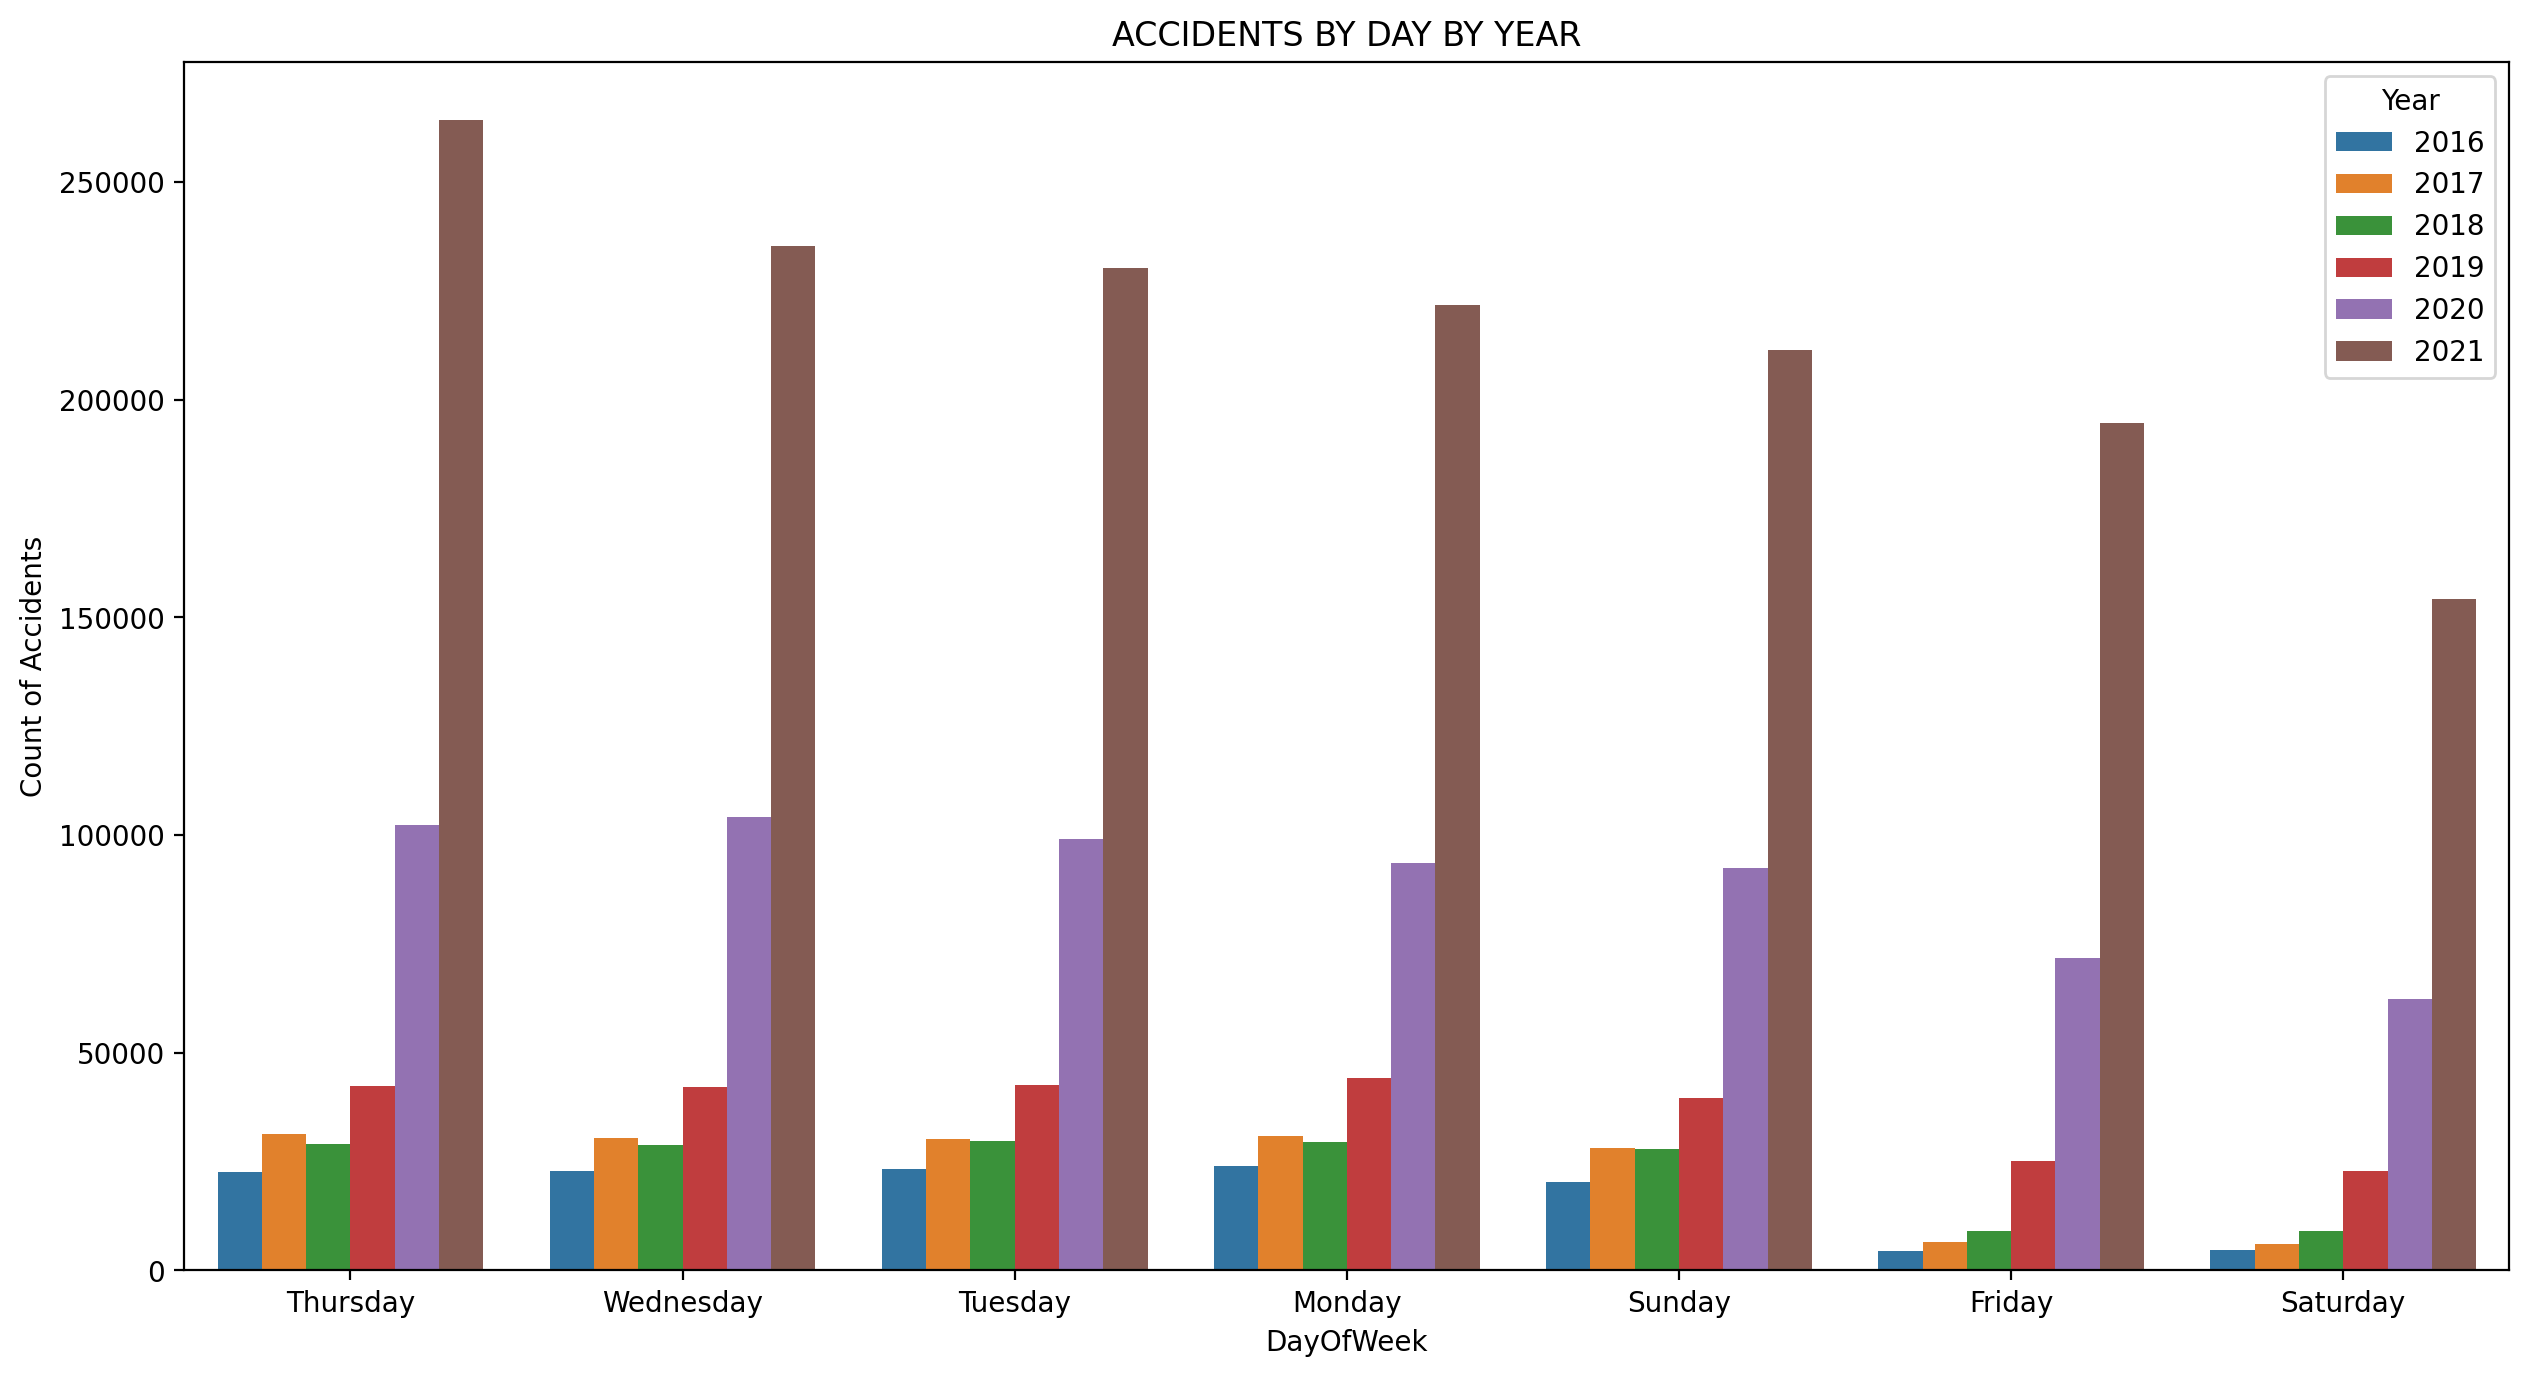

In [39]:
#Now let's plot the count of accidents per day 

fig=plt.figure(figsize=(15,8),dpi=200)
sns.barplot(data=weekly_accidents,x='DayOfWeek',y='Count of Accidents',hue='Year')
plt.title('ACCIDENTS BY DAY BY YEAR')
plt.show()

__Now we are going to see the severity of the accident which is the object of this exploratory data analysis project.__

In [40]:
df['Severity']

0          3
1          2
2          2
3          2
4          3
          ..
2845337    2
2845338    2
2845339    2
2845340    2
2845341    2
Name: Severity, Length: 2845205, dtype: int64

In [41]:
severity_per_year=df[['Severity','Year']].value_counts().sort_values(ascending=False).reset_index()

In [42]:
severity_per_year
severity_per_year.columns=['Severity','Year','Count of Accidents']

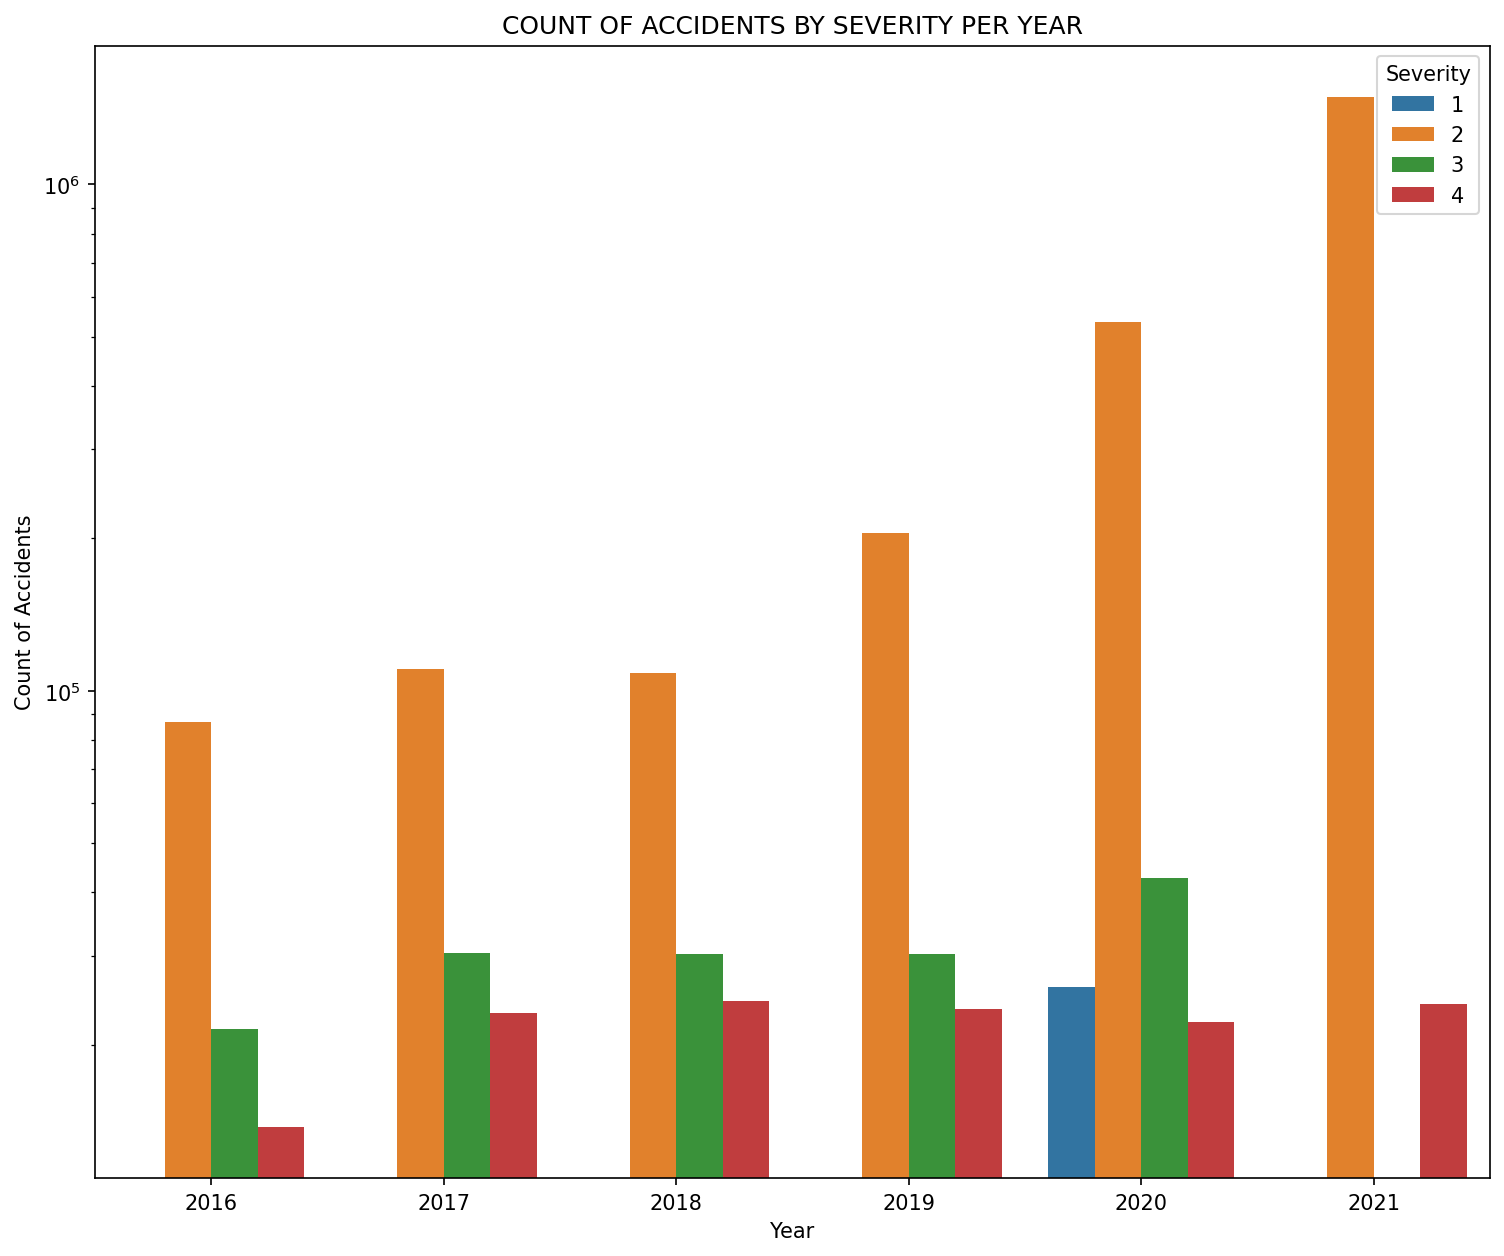

In [43]:
fig=plt.figure(figsize=(12,10),dpi=150)
sns.barplot(data=severity_per_year,x='Year',y='Count of Accidents',hue='Severity')
plt.yscale('log')
plt.title('COUNT OF ACCIDENTS BY SEVERITY PER YEAR')
plt.show()

## Weather Analysis

__We notice that the temperature in the dataframe is in Fahreneit but since we are doing an analysis in Europe we must convert the temperature column from a Fahreneit one to a Celsius.__

In [44]:
#First we are going to create a function

def fahr_to_cel(fahr):
    temp_celcius=(fahr-32)*5/9
    return temp_celcius


__Now that we created that function we will apply it to the existing temperature column,and we are going to create a new column that we are gonna name 'Temperature in C',in the existing df dataframe.__

In [45]:
df['Temperature in C']=df['Temperature(F)'].apply(fahr_to_cel)

In [46]:
#Let's now see how our newly created column looks like.
df['Temperature in C']


#Great,seems that our function worked and now the temps are in Celcius.

0           5.611111
1           2.722222
2           2.222222
3           3.888889
4           2.777778
             ...    
2845337    30.000000
2845338    21.111111
2845339    22.777778
2845340    21.666667
2845341    26.111111
Name: Temperature in C, Length: 2845205, dtype: float64

In [47]:
#Now we must put them in exact bins becaue the distinct values are so many.

range_temp=pd.cut(df['Temperature in C'],8)
range_temp.unique()

[(-7.847, 11.944], (-27.639, -7.847], (11.944, 31.736], (31.736, 51.528], (-47.431, -27.639], (51.528, 71.319], (71.319, 91.111], (-67.381, -47.431]]
Categories (8, interval[float64, right]): [(-67.381, -47.431] < (-47.431, -27.639] < (-27.639, -7.847] < (-7.847, 11.944] < (11.944, 31.736] < (31.736, 51.528] < (51.528, 71.319] < (71.319, 91.111]]

In [48]:
df.loc[(df['Temperature in C']<=0),'Temperature in C']=1
df.loc[(df['Temperature in C']>0) & (df['Temperature in C']<=10),'Temperature in C']=2
df.loc[(df['Temperature in C']>10) & (df['Temperature in C']<=20),'Temperature in C']=3
df.loc[(df['Temperature in C']>20) & (df['Temperature in C']<=30),'Temperature in C']=4
df.loc[(df['Temperature in C']>30) & (df['Temperature in C']<=40),'Temperature in C']=5
df.loc[(df['Temperature in C']>40),'Temperature in C']=6

In [49]:
weather_dist=df['Temperature in C'].value_counts().sort_values(ascending=False).reset_index()
weather_dist.columns=['range_temp','number of Accidents']
weather_dist

,range_temp,number of Accidents
0,3.0,985768
1,4.0,921786
2,2.0,738124
3,5.0,196013
4,6.0,3514


__Now of course if we leave the above wather_dist[range_temp] column like that,someone who is not familiar with code won't be able to extrapolate the info that's hidden within so we are going to change the range_temp column a bit.__

In [50]:
weather_dist['range_temp']=weather_dist['range_temp'].map({1:'Below 0 Celsius',
                                                          2:'Between 0 and 10 Celsius',
                                                          3:'Between 10  and 20 Celsius',
                                                          4:'Between 20 and 30 Celsius',
                                                          5:'Between 30 and 40 Celsisus',
                                                          6:'Above 40 Celsius'})

In [51]:
weather_dist

,range_temp,number of Accidents
0,Between 10 and 20 Celsius,985768
1,Between 20 and 30 Celsius,921786
2,Between 0 and 10 Celsius,738124
3,Between 30 and 40 Celsisus,196013
4,Above 40 Celsius,3514


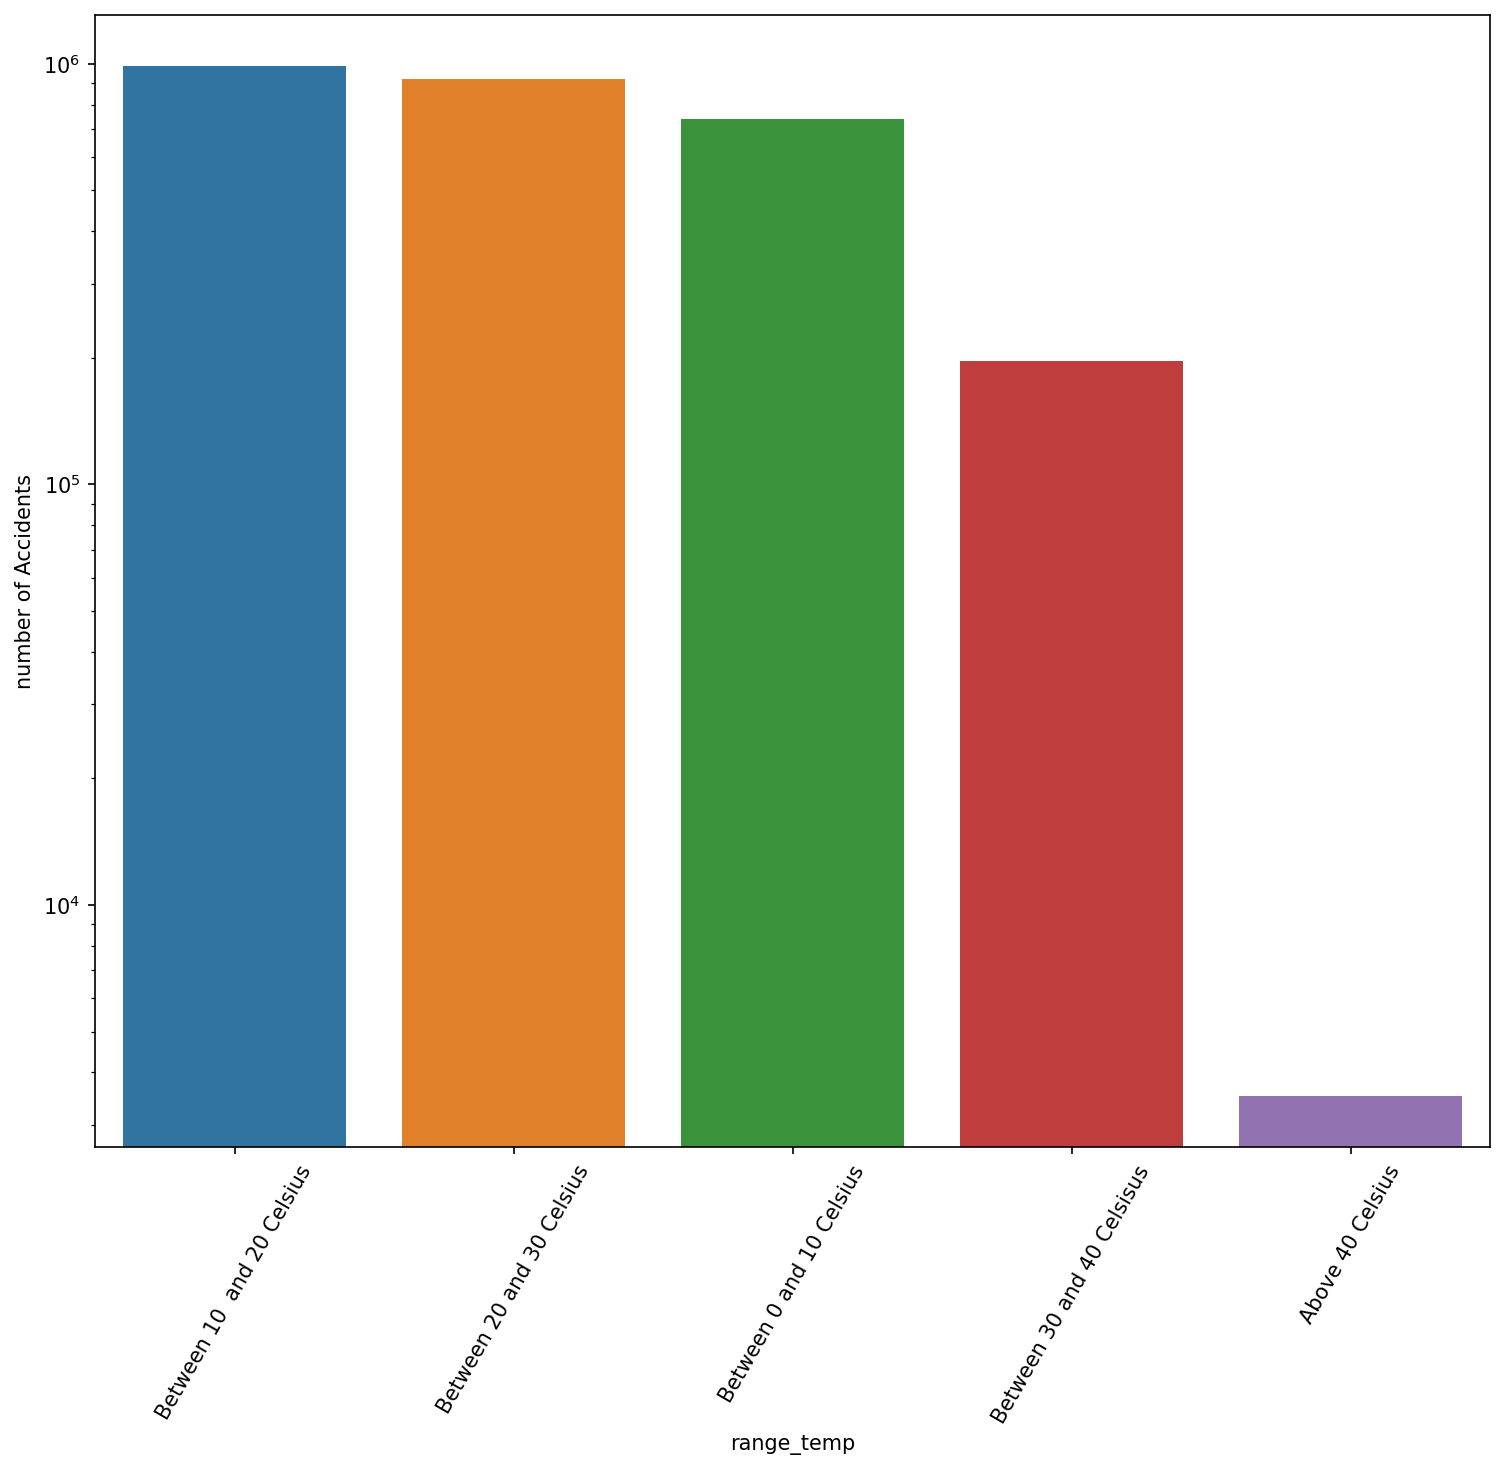

In [57]:
#Now we are going to plot this.
fig=plt.figure(figsize=(12,10),dpi=150)
sns.barplot(data=weather_dist,x='range_temp',y='number of Accidents')
plt.xticks(rotation=60)
plt.yscale('log')
plt.show()

## __Analysis for the humidity.__
<br>

__We are gonna follow the same approach as we did in the transformation of the weather column.__

In [58]:
df.loc[(df["Humidity(%)"]<=20),"Humidity(%)"]=1
df.loc[(df["Humidity(%)"]>20) & (df["Humidity(%)"]<=40),"Humidity(%)"]=2
df.loc[(df["Humidity(%)"]>40) & (df["Humidity(%)"]<=60),"Humidity(%)"]=3
df.loc[(df["Humidity(%)"]>60) & (df["Humidity(%)"]<=80),"Humidity(%)"]=4
df.loc[(df["Humidity(%)"]>80) & (df["Humidity(%)"]<=100),"Humidity(%)"]=5
df.loc[(df["Humidity(%)"]>100),"Humidity(%)"]=6

In [59]:
df["Humidity(%)"].unique()

array([3., 5., 4., 2., 1.])

In [62]:
humid_df=df['Humidity(%)'].value_counts().sort_values(ascending=False).reset_index()

In [64]:
humid_df['index']=humid_df['index'].map({1:'Below 20% Humidity',
                                                          2:'Between 20 and 40 Humidity',
                                                          3:'Between 40  and 60 Humidity',
                                                          4:'Between 60 and 80 Humidity',
                                                          5:'Between 80 and 100 Humidity',
                                                          6:'Above 100 Humidity'})

In [65]:
humid_df

,index,Humidity(%)
0,Between 60 and 80 Humidity,880561
1,Between 80 and 100 Humidity,827283
2,Between 40 and 60 Humidity,660487
3,Between 20 and 40 Humidity,363369
4,Below 20% Humidity,113505


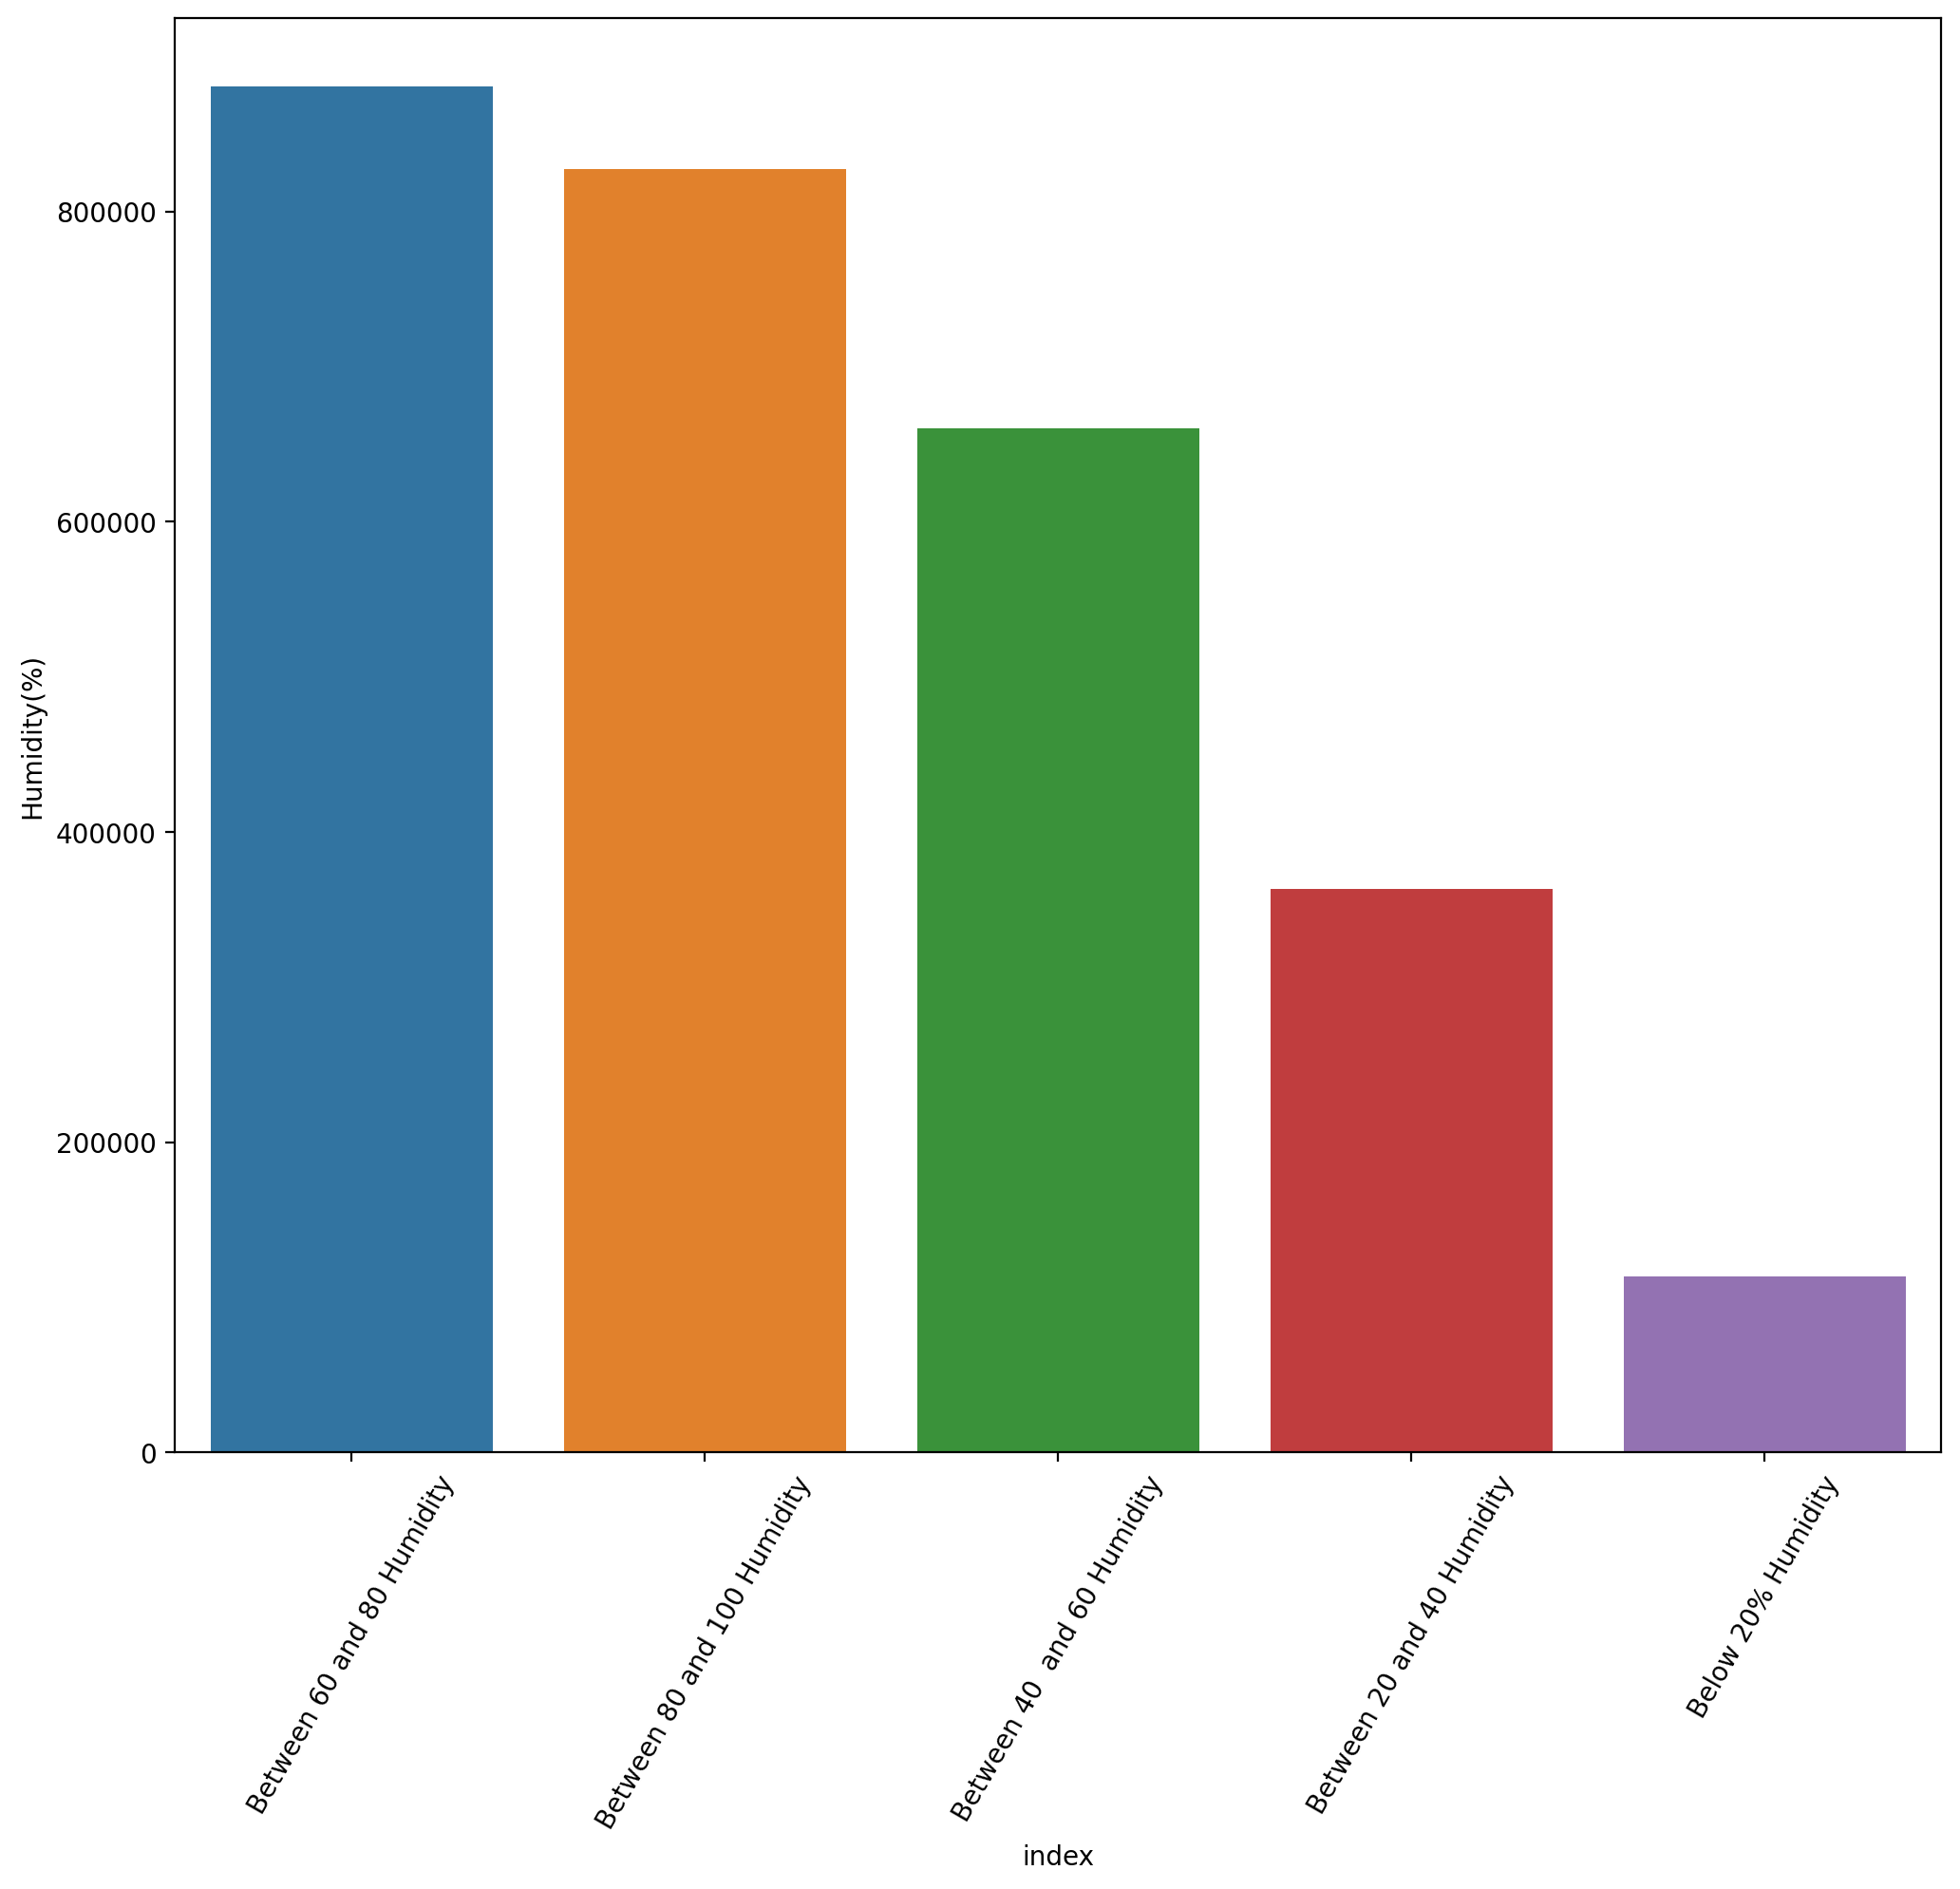

In [71]:
fig=plt.figure(figsize=(12,10),dpi=200)
sns.barplot(data=humid_df,x='index',y='Humidity(%)')
plt.xticks(rotation=60)
plt.show()

In [72]:
df["Weather_Condition"].value_counts()

Fair                        1177770
Mostly Cloudy                363949
Cloudy                       348752
Partly Cloudy                249921
Clear                        173817
                             ...   
Sleet / Windy                     1
Mist / Windy                      1
Blowing Sand                      1
Heavy Freezing Rain               1
Thunder and Hail / Windy          1
Name: Weather_Condition, Length: 127, dtype: int64

In [73]:
df[["Weather_Condition","Severity"]].value_counts().sort_values(ascending=False)[:10]

Weather_Condition  Severity
Fair               2           1105146
Cloudy             2            323200
Mostly Cloudy      2            319517
Partly Cloudy      2            221343
Clear              2            118636
Light Rain         2            112495
Overcast           2             55512
Fog                2             38575
Light Snow         2             38043
Haze               2             34135
dtype: int64

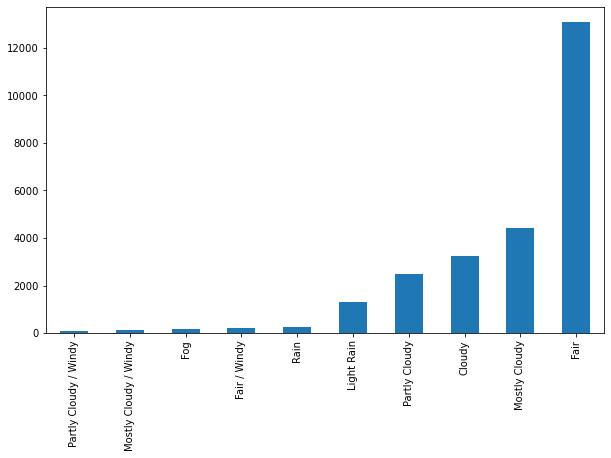

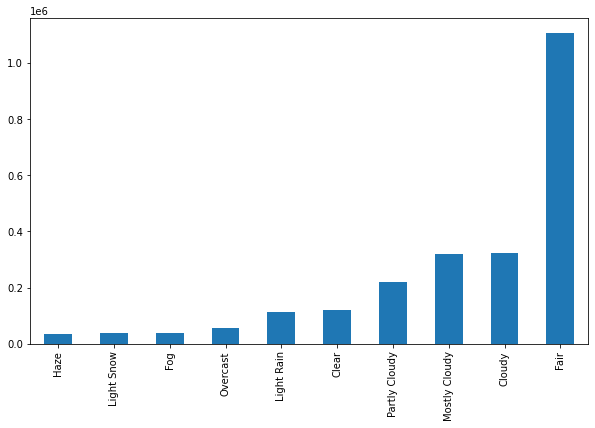

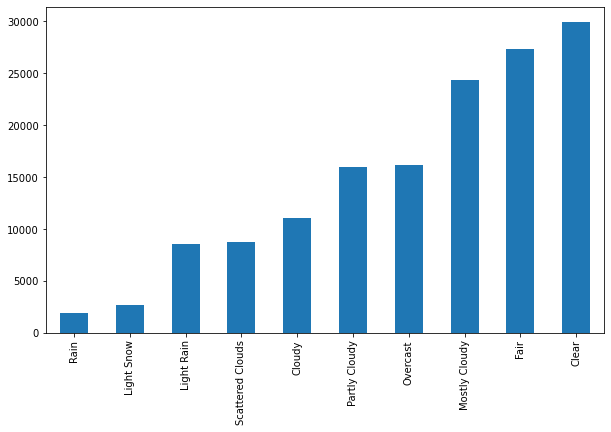

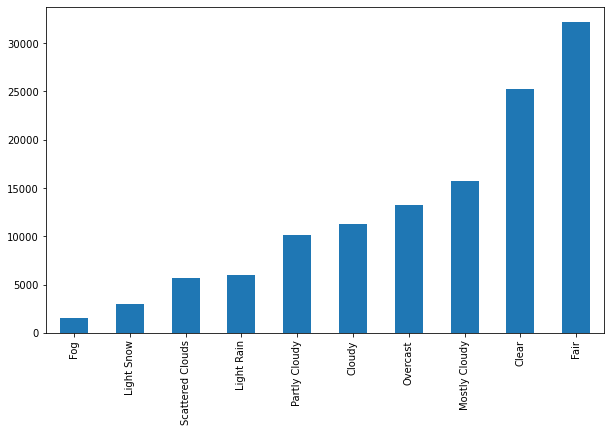

In [74]:
for x in range(1,5):
    plt.subplots(figsize=(10,6))
    df.loc[df["Severity"] == x]['Weather_Condition'].value_counts().sort_values()[-10:].plot(kind="bar")


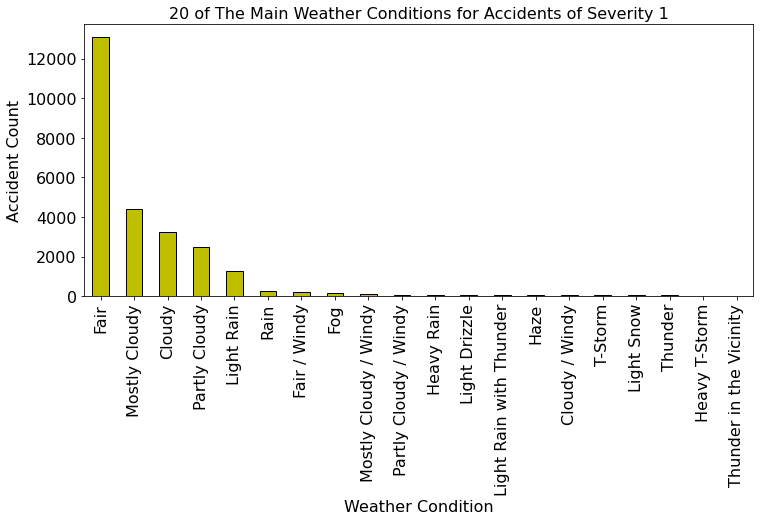

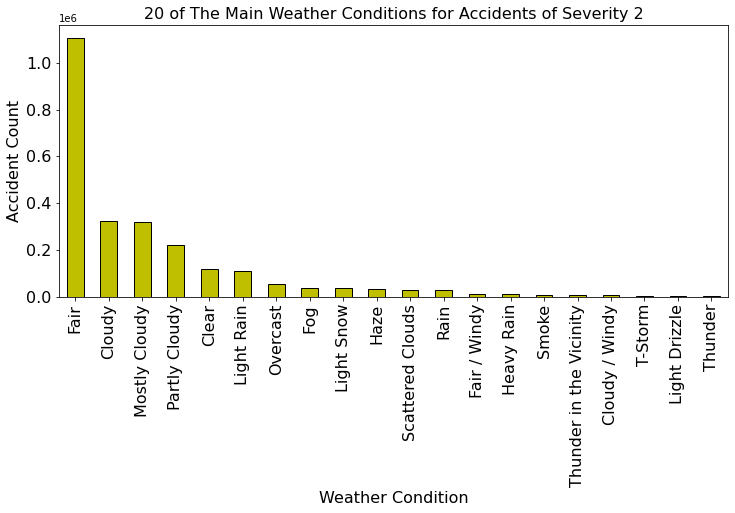

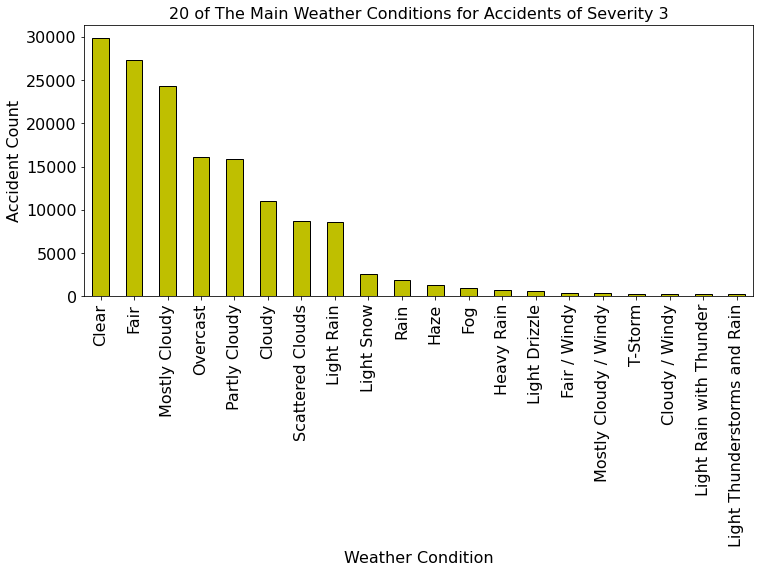

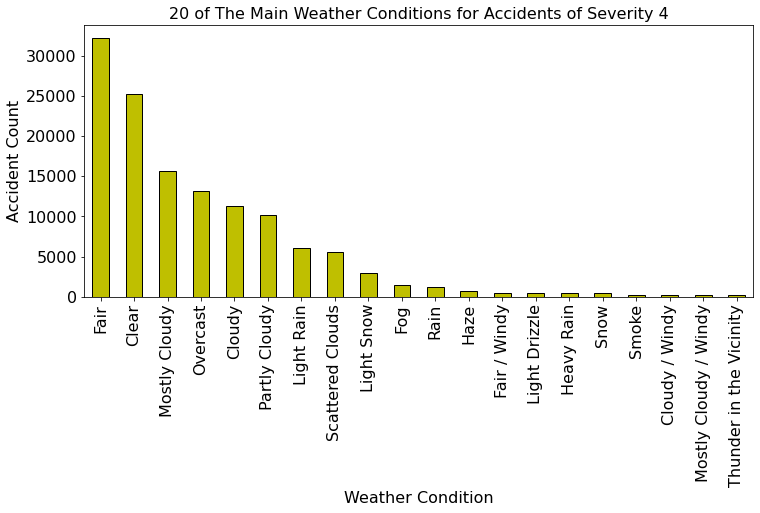

In [75]:
for x in np.arange(1,5):
    plt.subplots(figsize=(12,5))
    df.loc[df["Severity"] == x]['Weather_Condition'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('20 of The Main Weather Conditions for Accidents of Severity ' + str(x),fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

__From the above plot we can easily see that no matter the severity of the accidents the most common weather was in the state of 'Fair',meaning that the weather conditions were good most of the times,and the accidents weren't cause by some bad weather conditions.


In [82]:
values=["Fog","Light Rain","Rain","Heavy Rain","Snow"]

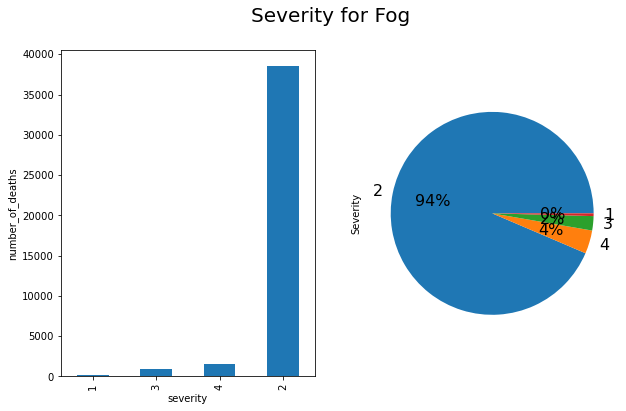

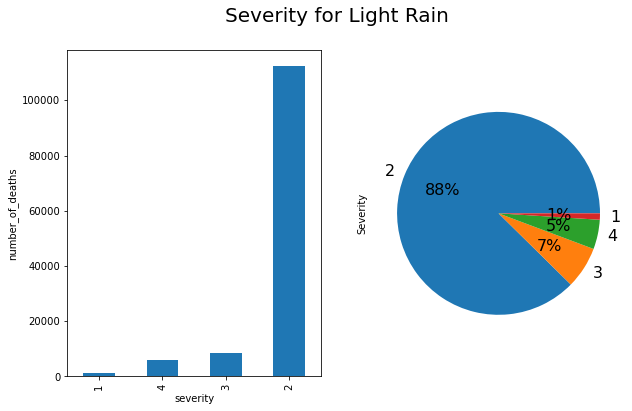

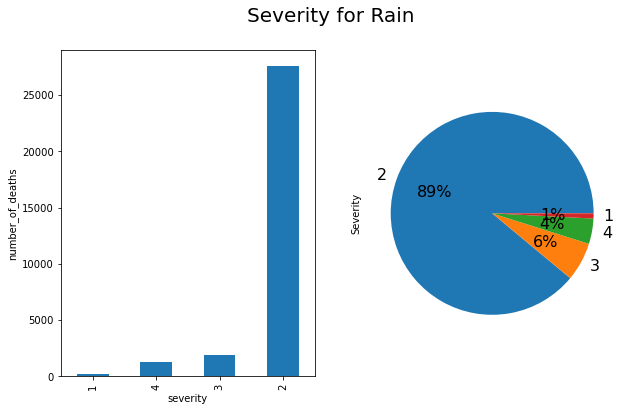

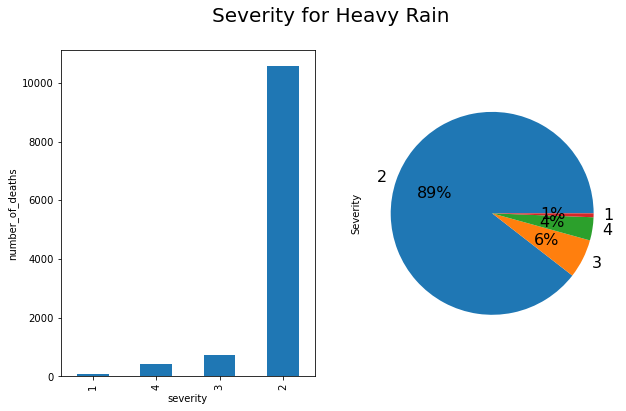

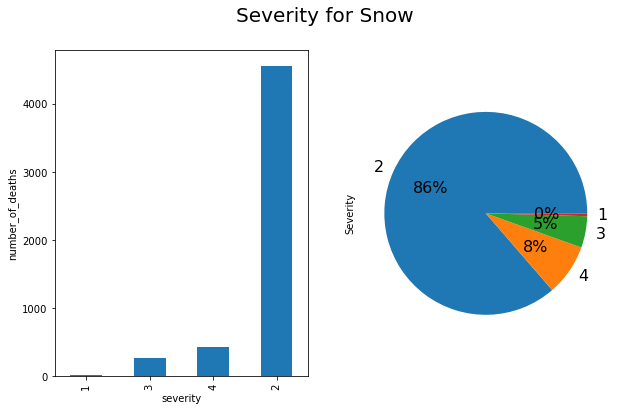

In [83]:
for x in ["Fog","Light Rain","Rain","Heavy Rain","Snow"]:
    plt.subplots(1,2,figsize=(10,6))
    plt.subplot(1,2,1)
    df.loc[df["Weather_Condition"]==x]["Severity"].value_counts().sort_values().plot(kind="bar")
    plt.suptitle("Severity for "+str(x),fontsize=20)
    plt.xlabel("severity")
    plt.ylabel("number_of_deaths")
    plt.subplot(1,2,2)
    df.loc[df["Weather_Condition"] == x]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

## Insights of the EDA.

* 1. Miami is the city with highest (2.64%) no. of road accidents in US (2016-2020).

* 2. Houston is the city with 2nd highest (2.39%) no. of road accidents in US (2016-2020).

* 3.3 out of top 10 cities with most no. of accident cases is from the state, California.

* Around 81% (8,682 Cities) of all cities in US, have less than 100 total no. of road accidents.

* In US, California is the state with highest no. of road accidents in past 5 years.

* In past 5 years, averagely 246 accidents (daily) happened in California implies approximately 10 accidents per hour.

* About 30% of the total accident records of past 5 years in US is only from California.

* In 80% Cases of road accidents, the impact on the traffic was Moderate (Severity-2).

* Around 18% of the road accidents occurred in the month of December.

* Working Days of the week have almost 2 times higher accident percentage, compared with the Weekend Days which is as our expectation.

* On Sunday the percentage of road accidents in US is lowest.


